# Data Cleaning bom.movie 



In [1]:
import pandas as pd
import numpy as np


In [2]:
!ls


Data Join Visualization.ipynb
Profit Primary Genre.png
Profit Secondary Genre.png
Profit Tertiary Genre.png
README.md
Top 10 Actors.png
Top 10 Driectors.png
Top 10 Writers.png
Top Genre Frequency.png
Top Genre Profit.png
Top Genre ROI.png
Top Primary Genre.png
Top Secondary Genre.png
Top Tertiary Genre.png
Untitled.ipynb
Worldwide Profit over Month.png
bom.movie_gross.csv
name.basics.csv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tn.movie_budgets.csv
zippedData


In [3]:
bom = pd.read_csv('bom.movie_gross.csv')

In [4]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom['foreign_gross'] = bom['foreign_gross'].replace(',','', regex = True)
#getting rid of commas so I can covert string to a float

In [6]:
bom['foreign_gross']= bom['foreign_gross'].astype(float)
#converting string to float

In [7]:
top_500_dom = bom.nlargest(500, ['domestic_gross'])

In [8]:
top_500_dom.isna().sum()
#looking to find if there are many null values in the top 500 movies
#null values aren't relevant in top 500 which means we can get rid of all rows that have nulls 


title             0
studio            0
domestic_gross    0
foreign_gross     2
year              0
dtype: int64

In [9]:
bom = bom[bom['domestic_gross'].notna()]

In [10]:
bom = bom[bom['studio'].notna()]

In [11]:
bom = bom[bom['foreign_gross'].notna()]

#getting rid of missing values

In [12]:
bom['worldwide_gross(millions)'] = (bom['domestic_gross'] + bom['foreign_gross'])/(10**6)
bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025.5000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960.3000
3,Inception,WB,292600000.0,535700000.0,2010,828.3000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.5014
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540
3309,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,0.0984


In [13]:
bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025.5000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960.3000
3,Inception,WB,292600000.0,535700000.0,2010,828.3000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.5014
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540
3309,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,0.0984


## Data cleaning name.basics



In [14]:
n_b = pd.read_csv('name.basics.csv')

In [15]:
n_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [16]:
n_b = n_b.drop('birth_year', 1)
#deleted birth year because not relevant

In [17]:
n_b = n_b[n_b['death_year'].isna()]
#got rid of any people who are dead

In [18]:
n_b = n_b.drop('death_year', 1)
#got rid of death year because no longer relevant

In [19]:
n_b = n_b[n_b['known_for_titles'].notna()]
# got rid of na values in title id

In [20]:
n_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569766 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              569766 non-null  object
 1   primary_name        569766 non-null  object
 2   primary_profession  529154 non-null  object
 3   known_for_titles    569766 non-null  object
dtypes: object(4)
memory usage: 21.7+ MB


In [21]:
n_b = n_b[n_b['primary_profession'].notna()]
#got rid of na values in primary profession

In [22]:
n_b

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606639,nm9989840,Mariya Shekaturova,actor,tt5953804
606640,nm9989854,Layla Louise,"actress,stunts","tt9910102,tt9898328,tt9335490,tt8894778"
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"


# Data cleaning title.akas

In [23]:
t_a = pd.read_csv('title.akas.csv')

In [24]:
t_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [25]:
t_a = t_a.drop('language', 1)

#dropped language because too many na's


In [26]:
t_a = t_a.drop('types', 1)
#dropped types because too many na's, not relevant

In [27]:
t_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   attributes         14925 non-null   object 
 5   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [28]:
t_a = t_a.drop('attributes', 1)
#dropped attributes because too many na's

In [29]:
# t_a.set_index('title_id', inplace = True)
# setting the title id as index

In [30]:
t_a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.7+ MB


In [31]:
is_original_title = t_a['is_original_title'] == 1

In [32]:
is_original_title = t_a[is_original_title]

In [33]:
t_a = is_original_title
#I only want original titles to get rid of repeats

In [34]:
t_a = t_a.drop('region', 1)

In [35]:
t_a = t_a.drop('ordering', 1)
#region and ordering are not relevant 

In [36]:
# Create new column tconst listing title id
t_a['tconst'] = t_a['title_id']

In [37]:
# Drop column title id since it is duplicate
t_a = t_a.drop('title_id', 1)
t_a

,title,is_original_title,tconst
38,Jurassic World,1.0,tt0369610
80,John Carter,1.0,tt0401729
83,Versailles Rediscovered - The Sun King's Vanis...,1.0,tt10010134
86,Miguelito - Canto a Borinquen,1.0,tt10027708
90,Thing I Don't Get,1.0,tt10050722
...,...,...,...
331690,Anderswo. Allein in Afrika,1.0,tt9723084
331692,Monkey King: The Volcano,1.0,tt9726638
331696,Big Shark,1.0,tt9755806
331698,Sayonara kuchibiru,1.0,tt9827784


#data cleaning title basics

In [38]:
!ls

Data Join Visualization.ipynb
Profit Primary Genre.png
Profit Secondary Genre.png
Profit Tertiary Genre.png
README.md
Top 10 Actors.png
Top 10 Driectors.png
Top 10 Writers.png
Top Genre Frequency.png
Top Genre Profit.png
Top Genre ROI.png
Top Primary Genre.png
Top Secondary Genre.png
Top Tertiary Genre.png
Untitled.ipynb
Worldwide Profit over Month.png
bom.movie_gross.csv
name.basics.csv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tn.movie_budgets.csv
zippedData


# Data cleaning title basics

In [39]:
t_b = pd.read_csv('title.basics.csv')

In [40]:
t_b

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [41]:
t_b = t_b.drop('runtime_minutes', 1)
#don think runtime is relevant data


In [42]:
t_b = t_b[t_b['genres'].notna()]
#getting rid of na values in genres 

In [43]:
t_b = t_b.drop('original_title', 1)
#getting rid of og title because not necessary


# data cleaning title crew

In [44]:
t_c = pd.read_csv('title.crew.csv')


In [45]:
t_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [46]:
t_c = t_c[t_c['directors'].notna()]

In [47]:
t_c = t_c[t_c['writers'].notna()]
#got rid of na values

In [48]:
t_c.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
6,tt0996958,nm2286991,"nm2286991,nm2651190"


# data cleaning title principals

In [49]:
t_p = pd.read_csv('title.principals.csv')

In [50]:
t_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [51]:
t_p = t_p.drop('characters',1)
# dropped characters not relevant

In [52]:
t_p = t_p.drop('ordering',1)

In [53]:
t_p = t_p.drop('job', 1)

In [54]:
t_p.rename({'category':'job'}, axis = 1, inplace = True)
#changed category to job because more accurate

In [55]:
t_p.head()

,tconst,nconst,job
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


# Data cleaning title rating

In [56]:
t_r = pd.read_csv('title.ratings.csv')



In [57]:
t_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [58]:
t_r.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Merge & Visualization

In [59]:
# Import python tools for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# List the info of the df that are being used
print('bom')
bom.info()
print()
print('n_b')
n_b.info()
print()
print('t_a')
t_a.info()
print()
print('t_b')
t_b.info()
print()
print('t_p')
t_p.info()

bom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      2007 non-null   object 
 1   studio                     2007 non-null   object 
 2   domestic_gross             2007 non-null   float64
 3   foreign_gross              2007 non-null   float64
 4   year                       2007 non-null   int64  
 5   worldwide_gross(millions)  2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB

n_b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 529154 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              529154 non-null  object
 1   primary_name        529154 non-null  object
 2   primary_profession  529154 non-null  object
 3   known_for_tit

In [61]:
# Create a bar chart for average world wide profit for each genre
# Join the dataframe bom, t_a, and t_b into new dataframe pg (profit-gross)
pg1 = bom.merge(t_a, on = 'title', how = 'inner')
# check
#pg1
pg2 = pg1.merge(t_b, on ='tconst', how = 'inner')
pg2

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000,1.0,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,623.9000,1.0,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"Action,Adventure,Animation"
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.5014,1.0,tt2160105,I Still See You,2018,"Fantasy,Thriller"
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"Biography,Drama,War"
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,"Comedy,Drama,Romance"


Genre column contains multiple values. Therefore we need to split it.

In [62]:
# split genre with multiple values into 3 separate columns
split_genre = pg2['genres'].str.split(",")
genre = split_genre.to_list()
genre_cols = ['genre 1', "genre 2", "genre 3"]
genre_df = pd.DataFrame(genre, columns=genre_cols)
genre_df.head()

,genre 1,genre 2,genre 3
0,Adventure,Animation,Comedy
1,Action,Adventure,Sci-Fi
2,Adventure,Animation,Comedy
3,Adventure,Drama,Fantasy
4,Action,Adventure,Sci-Fi


In [63]:
# Create a split genre columns in pg2
pg2['genre 1'] = genre_df['genre 1']
pg2['genre 2'] = genre_df['genre 2']
pg2['genre 3'] = genre_df['genre 3']
pg2

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres,genre 1,genre 2,genre 3
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000,1.0,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",Adventure,Drama,Fantasy
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,623.9000,1.0,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"Action,Adventure,Animation",Action,Adventure,Animation
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.5014,1.0,tt2160105,I Still See You,2018,"Fantasy,Thriller",Fantasy,Thriller,None
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"Biography,Drama,War",Biography,Drama,War
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,"Comedy,Drama,Romance",Comedy,Drama,Romance


In [64]:
# Analyze the Genre Frequency for each genre column
genre_df.describe()

,genre 1,genre 2,genre 3
count,1425,1273,930
unique,15,20,19
top,Action,Drama,Thriller
freq,389,355,171


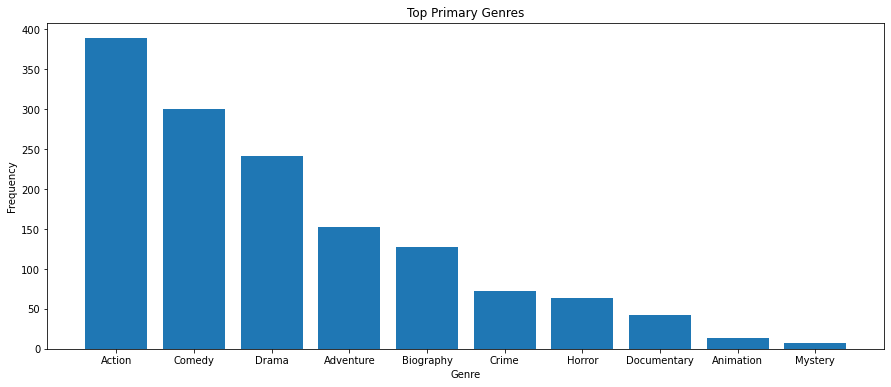

In [65]:
# Primary Genre Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in of each genre in genre 1
data = genre_df['genre 1'].value_counts().head(10)
# Get x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top Primary Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Primary Genre.png')

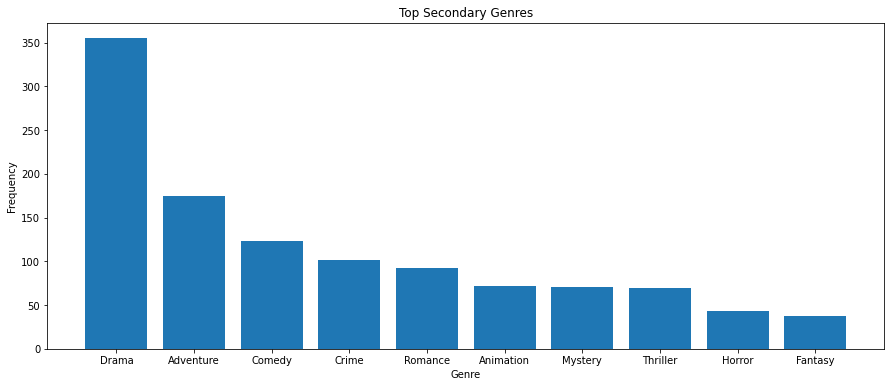

In [66]:
# Secondary Genre Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in of each genre in genre 2
data = genre_df['genre 2'].value_counts().head(10)
# Set x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top Secondary Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Secondary Genre.png')

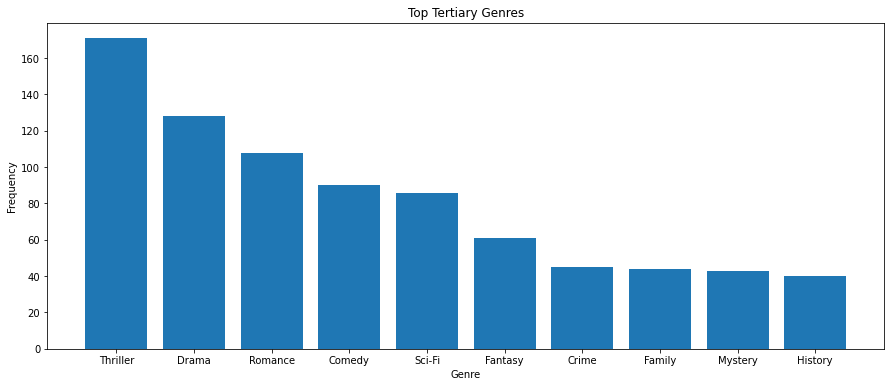

In [67]:
# Tertiary Genre Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in of each genre in genre 3
data = genre_df['genre 3'].value_counts().head(10)
# Get x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top Tertiary Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Tertiary Genre.png')

In [68]:
pg2['worldwide_gross'] = pg2['worldwide_gross(millions)']
pg2 = pg2.drop('worldwide_gross(millions)', 1)

In [69]:
# Find the average worldwide profit by genre
# Group by the primary genre (genre 1 ) with average worldwide gross profit
profit_genre = pg2.groupby(['genre 1']).worldwide_gross.mean()
profit_genre

genre 1
Action         241.334093
Adventure      277.733003
Animation      197.746808
Biography       71.629573
Comedy          70.539559
Crime           61.043074
Documentary     31.897348
Drama           60.249536
Family         857.600000
Fantasy         27.694100
Horror          99.202727
Music            8.000000
Mystery        108.205000
Romance         35.394775
Thriller        72.305240
Name: worldwide_gross, dtype: float64

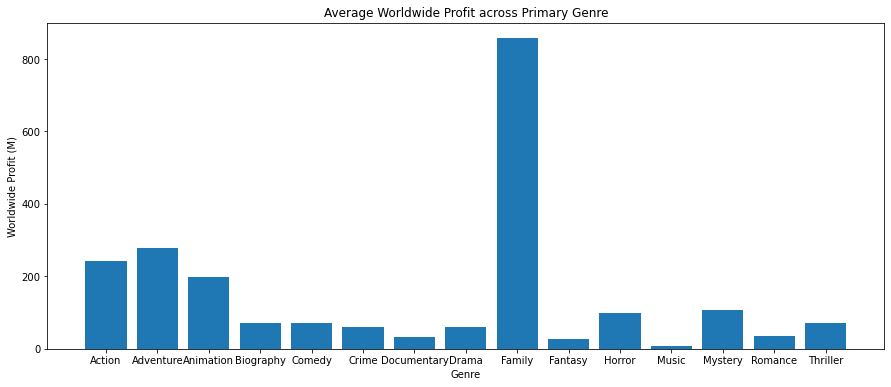

In [70]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_genre.index
y = profit_genre.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Average Worldwide Profit across Primary Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)') # Find an ROI or budget  Rn is revenue 
# Save figure
plt.savefig('Profit Primary Genre.png')

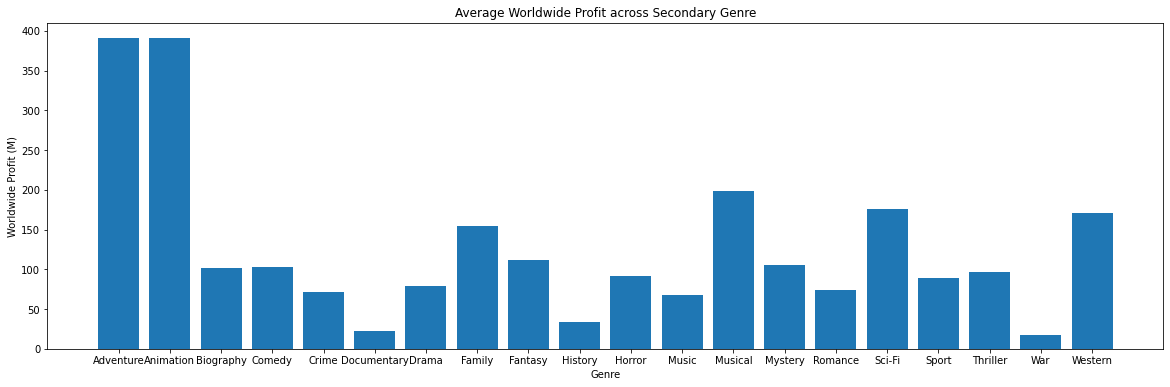

In [71]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,6))
# Group by the secondary genre (genre 2 ) with average worldwide gross profit
profit_genre2 = pg2.groupby(['genre 2']).worldwide_gross.mean()
# Set x and y data
x = profit_genre2.index
y = profit_genre2.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Average Worldwide Profit across Secondary Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Profit Secondary Genre.png')

Text(0, 0.5, 'Worldwide Profit (M)')

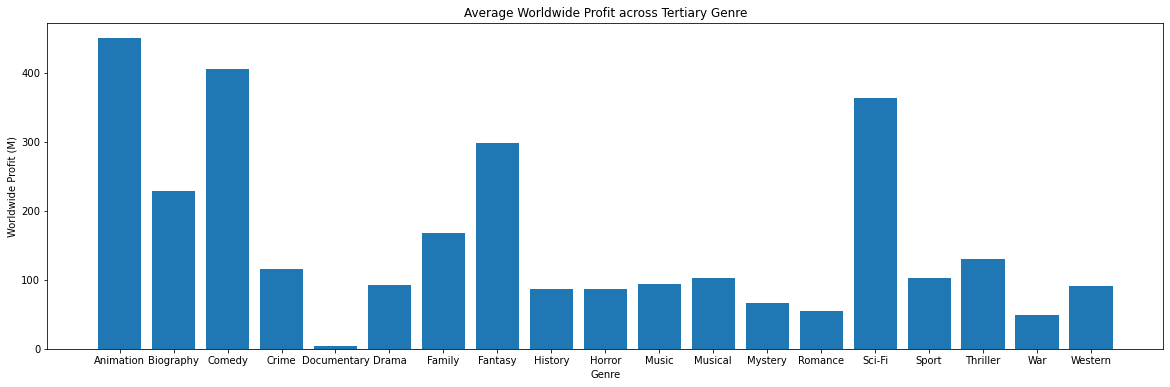

In [72]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,6))
# Group by the tertiary genre (genre 3 ) with average worldwide gross profit
profit_genre3 = pg2.groupby(['genre 3']).worldwide_gross.mean()
# Set x and y data
x = profit_genre3.index
y = profit_genre3.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Average Worldwide Profit across Tertiary Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
#plt.savefig('Profit Tertiary Genre.png')

In [73]:
#genre_year = {}
#years = pg2['year'].unique().tolist()
#for year in years:
    

In [74]:
# Merge title principle with the profit genre dataframe
pg3 = pg2.merge(t_p, on = 'tconst', how = 'inner')

In [75]:
pg3

,title,studio,domestic_gross,foreign_gross,year,is_original_title,tconst,primary_title,start_year,genres,genre 1,genre 2,genre 3,worldwide_gross,nconst,job
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0005271,composer
1,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0000158,actor
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0000741,actor
3,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0000349,actress
4,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0000885,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14097,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm0159510,archive_footage
14098,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm2615851,director
14099,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm4333147,producer
14100,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm1756961,cinematographer


In [76]:
# Merge name basic with the profit genre dataframe
pg4 = pg3.merge(n_b, on = 'nconst', how = 'inner')

In [77]:
pg4

,title,studio,domestic_gross,foreign_gross,year,is_original_title,tconst,primary_title,start_year,genres,genre 1,genre 2,genre 3,worldwide_gross,nconst,job,primary_name,primary_profession,known_for_titles
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
1,Monsters University,BV,268500000.0,475700000.0,2013,1.0,tt1453405,Monsters University,2013,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,744.2000,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0000,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
3,Larry Crowne,Uni.,35600000.0,36400000.0,2011,1.0,tt1583420,Larry Crowne,2011,"Comedy,Drama,Romance",Comedy,Drama,Romance,72.0000,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
4,Extremely Loud & Incredibly Close,WB,31800000.0,23400000.0,2011,1.0,tt0477302,Extremely Loud & Incredibly Close,2011,"Adventure,Drama,Mystery",Adventure,Drama,Mystery,55.2000,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm0118371,self,Joan Juliet Buck,actress,"tt4016454,tt1135503"
13689,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm0159485,self,Michael Chow,actor,"tt0120812,tt0062512,tt1078588,tt0122151"
13690,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm2615851,director,James Crump,"director,writer,producer","tt5792490,tt1003113,tt4096620"
13691,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,0.0732,nm1756961,cinematographer,Robert O'Haire,"sound_department,cinematographer,camera_depart...","tt0780625,tt4123650,tt1961535,tt4683968"


In [78]:
# Rename all merged dataframe to df_merged
df_merged = pg4

In [79]:
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13693 non-null  object 
 1   studio              13693 non-null  object 
 2   domestic_gross      13693 non-null  float64
 3   foreign_gross       13693 non-null  float64
 4   year                13693 non-null  int64  
 5   is_original_title   13693 non-null  float64
 6   tconst              13693 non-null  object 
 7   primary_title       13693 non-null  object 
 8   start_year          13693 non-null  int64  
 9   genres              13693 non-null  object 
 10  genre 1             13693 non-null  object 
 11  genre 2             12329 non-null  object 
 12  genre 3             9017 non-null   object 
 13  worldwide_gross     13693 non-null  float64
 14  nconst              13693 non-null  object 
 15  job                 13693 non-null  object 
 16  prim

,title,studio,domestic_gross,foreign_gross,year,is_original_title,tconst,primary_title,start_year,genres,genre 1,genre 2,genre 3,worldwide_gross,nconst,job,primary_name,primary_profession,known_for_titles
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
1,Monsters University,BV,268500000.0,475700000.0,2013,1.0,tt1453405,Monsters University,2013,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,744.2,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,1067.0,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
3,Larry Crowne,Uni.,35600000.0,36400000.0,2011,1.0,tt1583420,Larry Crowne,2011,"Comedy,Drama,Romance",Comedy,Drama,Romance,72.0,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
4,Extremely Loud & Incredibly Close,WB,31800000.0,23400000.0,2011,1.0,tt0477302,Extremely Loud & Incredibly Close,2011,"Adventure,Drama,Mystery",Adventure,Drama,Mystery,55.2,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"


In [80]:
df_merged = df_merged.drop(columns=['domestic_gross','foreign_gross', 'is_original_title', 'primary_title' 
                                    ,'genres', 'start_year', 'nconst', 'primary_profession', 'known_for_titles', 'tconst'], axis = 1)

In [81]:
df_merged.head()

,title,studio,year,genre 1,genre 2,genre 3,worldwide_gross,job,primary_name
0,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,composer,Randy Newman
1,Monsters University,BV,2013,Adventure,Animation,Comedy,744.2,composer,Randy Newman
2,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,actor,Tom Hanks
3,Larry Crowne,Uni.,2011,Comedy,Drama,Romance,72.0,actor,Tom Hanks
4,Extremely Loud & Incredibly Close,WB,2011,Adventure,Drama,Mystery,55.2,actor,Tom Hanks


In [82]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            13693 non-null  object 
 1   studio           13693 non-null  object 
 2   year             13693 non-null  int64  
 3   genre 1          13693 non-null  object 
 4   genre 2          12329 non-null  object 
 5   genre 3          9017 non-null   object 
 6   worldwide_gross  13693 non-null  float64
 7   job              13693 non-null  object 
 8   primary_name     13693 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


In [83]:
df_merged['job'].value_counts()

actor                  3420
producer               2710
writer                 2421
actress                2055
director               1501
composer                754
cinematographer         449
editor                  241
self                     72
production_designer      65
archive_footage           5
Name: job, dtype: int64

In [84]:
df_merged.iloc[df_merged['job'] == 'self', df_merged.columns.get_loc('job')] = 'actor'
df_merged.iloc[df_merged['job'] == 'actress',  df_merged.columns.get_loc('job')] = 'actor'

In [85]:
# Check the result
df_merged['job'].value_counts()

actor                  5547
producer               2710
writer                 2421
director               1501
composer                754
cinematographer         449
editor                  241
production_designer      65
archive_footage           5
Name: job, dtype: int64

In [86]:
df_merged

,title,studio,year,genre 1,genre 2,genre 3,worldwide_gross,job,primary_name
0,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0000,composer,Randy Newman
1,Monsters University,BV,2013,Adventure,Animation,Comedy,744.2000,composer,Randy Newman
2,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0000,actor,Tom Hanks
3,Larry Crowne,Uni.,2011,Comedy,Drama,Romance,72.0000,actor,Tom Hanks
4,Extremely Loud & Incredibly Close,WB,2011,Adventure,Drama,Mystery,55.2000,actor,Tom Hanks
...,...,...,...,...,...,...,...,...,...
13688,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,Biography,Documentary,None,0.0732,actor,Joan Juliet Buck
13689,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,Biography,Documentary,None,0.0732,actor,Michael Chow
13690,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,Biography,Documentary,None,0.0732,director,James Crump
13691,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,Biography,Documentary,None,0.0732,cinematographer,Robert O'Haire


In [87]:
# Create the dataframe that only contains job = director
df_director = df_merged.loc[df_merged['job'] == 'director']
df_director

,title,studio,year,genre 1,genre 2,genre 3,worldwide_gross,job,primary_name
20,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0000,director,Lee Unkrich
21,Coco,BV,2017,Adventure,Animation,Comedy,807.1000,director,Lee Unkrich
23,Cars 2,BV,2011,Adventure,Animation,Comedy,562.2000,director,John Lasseter
26,John Carter,BV,2012,Action,Adventure,Sci-Fi,284.2000,director,Andrew Stanton
27,Finding Dory,BV,2016,Adventure,Animation,Comedy,1028.6000,director,Andrew Stanton
...,...,...,...,...,...,...,...,...,...
13641,Blindspotting,LG/S,2018,Comedy,Crime,Drama,4.8300,director,Carlos López Estrada
13670,Bilal: A New Breed of Hero,VE,2018,Action,Adventure,Animation,2.1910,director,Khurram H. Alavi
13671,Bilal: A New Breed of Hero,VE,2018,Action,Adventure,Animation,2.1910,director,Ayman Jamal
13684,Time Freak,Grindstone,2018,Comedy,Drama,Romance,0.2660,director,Andrew Bowler


In [88]:
profit_director = df_director.groupby(['primary_name']).worldwide_gross.mean()
profit_director = profit_director.sort_values(ascending = False)
profit_director = profit_director.nlargest(n=10)

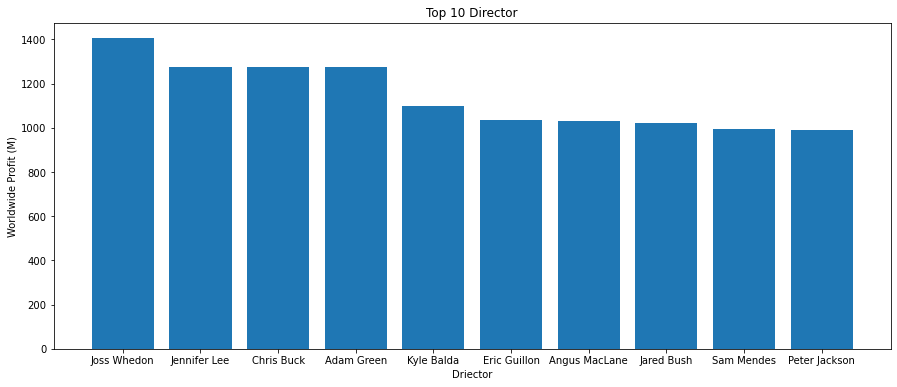

In [89]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_director.index
y = profit_director.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Director')
ax.set_xlabel('Driector')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top 10 Driectors.png')

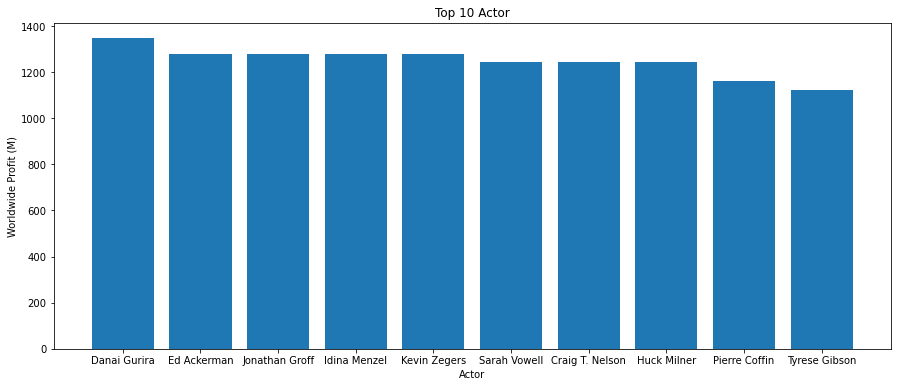

In [90]:
# Create the dataframe that only contains job = actor
df_actor = df_merged.loc[df_merged['job'] == 'actor']
profit_actor = df_actor.groupby(['primary_name']).worldwide_gross.mean()
profit_actor = profit_actor.sort_values(ascending = False)
profit_actor = profit_actor.nlargest(n=10)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_actor.index
y = profit_actor.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Actor')
ax.set_xlabel('Actor')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top 10 Actors.png')

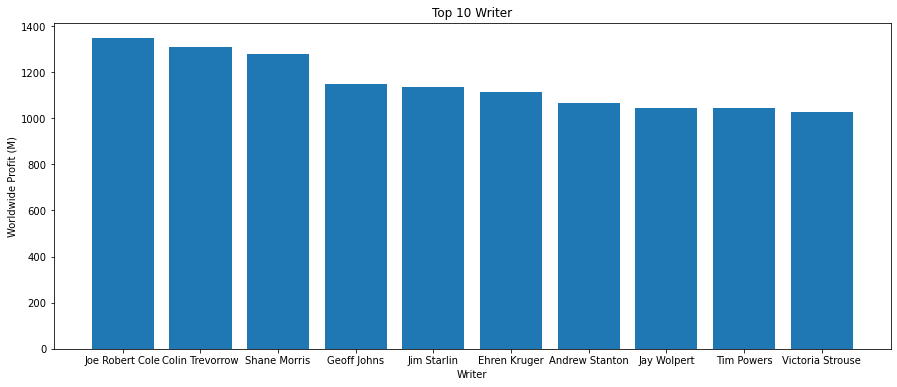

In [91]:
# Create the dataframe that only contains job = writer
df_writer = df_merged.loc[df_merged['job'] == 'writer']
# Create the data by grouping name of the writer by the average worldwide gross profit
profit_writer = df_writer.groupby(['primary_name']).worldwide_gross.mean()

profit_writer = profit_writer.sort_values(ascending = False)
profit_writer = profit_writer.nlargest(n=10)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_writer.index
y = profit_writer.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Writer')
ax.set_xlabel('Writer')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top 10 Writers.png')

In [92]:
t_m = pd.read_csv('tmdb.movies.csv')
t_m

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [93]:
t_m.drop(columns=['Unnamed: 0', 'original_language', 'original_title'], inplace=True)

In [94]:
t_m

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,0.600,2018-06-22,Trailer Made,0.0,1


In [95]:
t_m.drop(columns=['genre_ids', 'id', 'vote_average', 'vote_count'], inplace=True)

In [96]:
t_m = t_m.drop('popularity', 1)

In [97]:
df_merged2 = df_merged.merge(t_m, on = 'title', how = 'inner')

In [98]:
df_merged2

,title,studio,year,genre 1,genre 2,genre 3,worldwide_gross,job,primary_name,release_date
0,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,composer,Randy Newman,2010-06-17
1,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,actor,Tom Hanks,2010-06-17
2,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,actor,Tim Allen,2010-06-17
3,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,actor,Joan Cusack,2010-06-17
4,Toy Story 3,BV,2010,Adventure,Animation,Comedy,1067.0,actor,Ned Beatty,2010-06-17
...,...,...,...,...,...,...,...,...,...,...
15780,"Paul, Apostle of Christ",Affirm,2018,Adventure,Biography,Drama,23.1,director,Andrew Hyatt,2018-03-28
15781,"Paul, Apostle of Christ",Affirm,2018,Adventure,Biography,Drama,23.1,writer,Terence Berden,2018-03-28
15782,"Paul, Apostle of Christ",Affirm,2018,Adventure,Biography,Drama,23.1,producer,David Zelon,2018-03-28
15783,"Paul, Apostle of Christ",Affirm,2018,Adventure,Biography,Drama,23.1,composer,Jan A.P. Kaczmarek,2018-03-28


In [99]:
df_merged2.drop(columns = ['studio', 'year'], inplace = True)

In [100]:
df_merged2

,title,genre 1,genre 2,genre 3,worldwide_gross,job,primary_name,release_date
0,Toy Story 3,Adventure,Animation,Comedy,1067.0,composer,Randy Newman,2010-06-17
1,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Tom Hanks,2010-06-17
2,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Tim Allen,2010-06-17
3,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Joan Cusack,2010-06-17
4,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Ned Beatty,2010-06-17
...,...,...,...,...,...,...,...,...
15780,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,director,Andrew Hyatt,2018-03-28
15781,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,writer,Terence Berden,2018-03-28
15782,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,producer,David Zelon,2018-03-28
15783,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,composer,Jan A.P. Kaczmarek,2018-03-28


In [101]:
pd.to_datetime(df_merged2['release_date'])
df_merged2['month'] = pd.DatetimeIndex(df_merged2['release_date']).month


In [102]:
df_merged2

,title,genre 1,genre 2,genre 3,worldwide_gross,job,primary_name,release_date,month
0,Toy Story 3,Adventure,Animation,Comedy,1067.0,composer,Randy Newman,2010-06-17,6
1,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Tom Hanks,2010-06-17,6
2,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Tim Allen,2010-06-17,6
3,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Joan Cusack,2010-06-17,6
4,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Ned Beatty,2010-06-17,6
...,...,...,...,...,...,...,...,...,...
15780,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,director,Andrew Hyatt,2018-03-28,3
15781,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,writer,Terence Berden,2018-03-28,3
15782,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,producer,David Zelon,2018-03-28,3
15783,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,composer,Jan A.P. Kaczmarek,2018-03-28,3


In [103]:
profit_month = df_merged2.groupby(['month']).worldwide_gross.mean()

Text(0, 0.5, 'Worldwide Profit (M)')

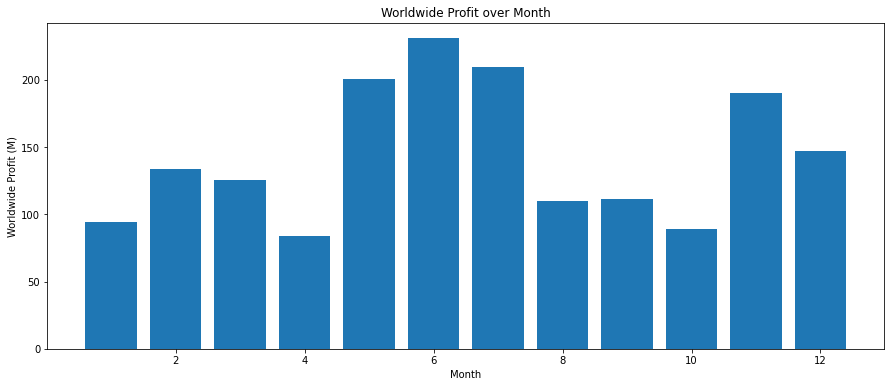

In [104]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_month.index
y = profit_month.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Worldwide Profit over Month')
ax.set_xlabel('Month')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
#plt.savefig('Worldwide Profit over Month.png')

In [105]:
m_b = pd.read_csv('tn.movie_budgets.csv')
m_b

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [106]:
m_b.info()
m_b.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [107]:
m_b = m_b.drop(columns=['release_date', 'id', 'domestic_gross'], axis = 1)
m_b

,movie,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


In [108]:
m_b.rename({'movie' : 'title'}, axis = 1, inplace=True)
m_b

,title,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


In [109]:
mb2 = m_b
mb2

,title,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


In [110]:
mb2[mb2.columns[1:]] = mb2[mb2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
m_b

,title,production_budget,worldwide_gross
0,Avatar,425000000.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,Dark Phoenix,350000000.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...
5777,Red 11,7000.0,0.000000e+00
5778,Following,6000.0,2.404950e+05
5779,Return to the Land of Wonders,5000.0,1.338000e+03
5780,A Plague So Pleasant,1400.0,0.000000e+00


In [111]:
m_b['profit'] = m_b['worldwide_gross'] - m_b['production_budget']

In [112]:
m_b['ROI'] = m_b['profit']*100/m_b['production_budget']
m_b

,title,production_budget,worldwide_gross,profit,ROI
0,Avatar,425000000.0,2.776345e+09,2.351345e+09,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,154.667286
2,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-57.210757
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,9.997217e+08,315.369636
...,...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,-7.000000e+03,-100.000000
5778,Following,6000.0,2.404950e+05,2.344950e+05,3908.250000
5779,Return to the Land of Wonders,5000.0,1.338000e+03,-3.662000e+03,-73.240000
5780,A Plague So Pleasant,1400.0,0.000000e+00,-1.400000e+03,-100.000000


In [113]:
df_merged3 = df_merged2.merge(m_b, on = 'title', how = 'inner')
df_merged3

,title,genre 1,genre 2,genre 3,worldwide_gross_x,job,primary_name,release_date,month,production_budget,worldwide_gross_y,profit,ROI
0,Toy Story 3,Adventure,Animation,Comedy,1067.0,composer,Randy Newman,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
1,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Tom Hanks,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
2,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Tim Allen,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
3,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Joan Cusack,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
4,Toy Story 3,Adventure,Animation,Comedy,1067.0,actor,Ned Beatty,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,director,Andrew Hyatt,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
12445,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,writer,Terence Berden,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
12446,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,producer,David Zelon,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
12447,"Paul, Apostle of Christ",Adventure,Biography,Drama,23.1,composer,Jan A.P. Kaczmarek,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960


# explode() Practice

In [114]:
new = bom.merge(t_a, on = 'title', how = 'inner')
# check

new2 = pg1.merge(t_b, on ='tconst', how = 'inner')

new2

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000,1.0,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,623.9000,1.0,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"Action,Adventure,Animation"
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.5014,1.0,tt2160105,I Still See You,2018,"Fantasy,Thriller"
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"Biography,Drama,War"
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,"Comedy,Drama,Romance"


In [115]:
new2.explode('genres')

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000,1.0,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,623.9000,1.0,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"Action,Adventure,Animation"
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.5014,1.0,tt2160105,I Still See You,2018,"Fantasy,Thriller"
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"Biography,Drama,War"
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,"Comedy,Drama,Romance"


In [116]:
genres2 = new2['genres']
genres2

0       Adventure,Animation,Comedy
1          Action,Adventure,Sci-Fi
2       Adventure,Animation,Comedy
3          Adventure,Drama,Fantasy
4          Action,Adventure,Sci-Fi
                   ...            
1420    Action,Adventure,Animation
1421              Fantasy,Thriller
1422           Biography,Drama,War
1423          Comedy,Drama,Romance
1424         Biography,Documentary
Name: genres, Length: 1425, dtype: object

In [117]:
new2['genres'] = new2['genres'].str.split(",")
#genre2 = split_genre.to_list()
#genre_cols2 = ['genre 1', "genre 2", "genre 3"]
#genre_df2 = pd.DataFrame(genre2, columns=genre_cols2)
#genre_df2.head()
new2

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,"[Adventure, Animation, Comedy]"
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,"[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000,1.0,tt0892791,Shrek Forever After,2010,"[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"[Adventure, Drama, Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,623.9000,1.0,tt1228705,Iron Man 2,2010,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"[Action, Adventure, Animation]"
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.5014,1.0,tt2160105,I Still See You,2018,"[Fantasy, Thriller]"
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"[Biography, Drama, War]"
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,"[Comedy, Drama, Romance]"


In [118]:
new2['genres'] = new2['genres'].tolist()
new2.explode('genres')

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,Adventure
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,Animation
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000,1.0,tt0435761,Toy Story 3,2010,Comedy
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,Action
1,Inception,WB,292600000.0,535700000.0,2010,828.3000,1.0,tt1375666,Inception,2010,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,Comedy
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,Drama
1423,Time Freak,Grindstone,10000.0,256000.0,2018,0.2660,1.0,tt6769280,Time Freak,2018,Romance
1424,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,Biography


# Creating New Merge Dataframe

In [119]:
df = t_a.merge(t_b, on ='tconst', how = 'inner')
df

,title,is_original_title,tconst,primary_title,start_year,genres
0,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi"
1,John Carter,1.0,tt0401729,John Carter,2012,"Action,Adventure,Sci-Fi"
2,Versailles Rediscovered - The Sun King's Vanis...,1.0,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary
3,Miguelito - Canto a Borinquen,1.0,tt10027708,Miguelito,2019,"Documentary,Music"
4,Thing I Don't Get,1.0,tt10050722,Thing I Don't Get,2018,Drama
...,...,...,...,...,...,...
44165,Anderswo. Allein in Afrika,1.0,tt9723084,Anderswo. Allein in Afrika,2018,"Adventure,Documentary"
44166,Monkey King: The Volcano,1.0,tt9726638,Monkey King: The Volcano,2019,"Action,Adventure,Comedy"
44167,Big Shark,1.0,tt9755806,Big Shark,2019,Horror
44168,Sayonara kuchibiru,1.0,tt9827784,Farewell Song,2019,"Music,Romance"


In [120]:
df2 = df.merge(t_p, on = 'tconst', how = 'inner')
df2

,title,is_original_title,tconst,primary_title,start_year,genres,nconst,job
0,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0189777,producer
1,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0695435,actor
2,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0397171,actress
3,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm1339223,actor
4,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0339460,actress
...,...,...,...,...,...,...,...,...
382752,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm1567587,producer
382753,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm7279677,cinematographer
382754,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm1341556,self
382755,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm4242087,self


In [121]:
df3 = df2.merge(n_b, on = 'nconst', how = 'inner')
df3

,title,is_original_title,tconst,primary_title,start_year,genres,nconst,job,primary_name,primary_profession,known_for_titles
0,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0189777,producer,Patrick Crowley,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
1,The Bourne Legacy,1.0,tt1194173,The Bourne Legacy,2012,"Action,Adventure,Thriller",nm0189777,producer,Patrick Crowley,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
2,Abduction,1.0,tt1600195,Abduction,2011,"Action,Mystery,Thriller",nm0189777,producer,Patrick Crowley,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
3,The Other Guys,1.0,tt1386588,The Other Guys,2010,"Action,Comedy,Crime",nm0189777,producer,Patrick Crowley,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
4,Jurassic World: Fallen Kingdom,1.0,tt4881806,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",nm0189777,producer,Patrick Crowley,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
...,...,...,...,...,...,...,...,...,...,...,...
361341,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm1567587,producer,Iñigo Fernández Ostolaza,"editor,producer,director","tt0254455,tt7524694,tt9880178,tt0471112"
361342,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm7279677,cinematographer,Javier de Usabel,"camera_department,cinematographer,art_department","tt4948838,tt7002576,tt8951078,tt4164866"
361343,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm1341556,self,Jaime Jaimes,director,"tt0358405,tt0451590"
361344,La atención,1.0,tt9880178,The Attention,2019,Documentary,nm4242087,self,Amparo Malo,actress,"tt5159898,tt1805202"


# Movie Budget Cleaning

In [122]:
m_b = pd.read_csv('tn.movie_budgets.csv')
m_b

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [123]:
pd.to_datetime(m_b['release_date'])
m_b['month'] = pd.DatetimeIndex(m_b['release_date']).month
m_b['start_year'] = pd.DatetimeIndex(m_b['release_date']).year
m_b = m_b.drop(columns=['release_date', 'id', 'domestic_gross'], axis = 1)
m_b.rename({'movie' : 'title'}, axis = 1, inplace=True)
m_b

,title,production_budget,worldwide_gross,month,start_year
0,Avatar,"$425,000,000","$2,776,345,279",12,2009
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",5,2011
2,Dark Phoenix,"$350,000,000","$149,762,350",6,2019
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",5,2015
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747",12,2017
...,...,...,...,...,...
5777,Red 11,"$7,000",$0,12,2018
5778,Following,"$6,000","$240,495",4,1999
5779,Return to the Land of Wonders,"$5,000","$1,338",7,2005
5780,A Plague So Pleasant,"$1,400",$0,9,2015


In [124]:
m_b[m_b.columns[1:]] = m_b[m_b.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
m_b['profit'] = m_b['worldwide_gross'] - m_b['production_budget']
m_b['ROI'] = m_b['profit']*100/m_b['production_budget']
m_b

,title,production_budget,worldwide_gross,month,start_year,profit,ROI
0,Avatar,425000000.0,2.776345e+09,12.0,2009.0,2.351345e+09,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,5.0,2011.0,6.350639e+08,154.667286
2,Dark Phoenix,350000000.0,1.497624e+08,6.0,2019.0,-2.002376e+08,-57.210757
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,5.0,2015.0,1.072414e+09,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,12.0,2017.0,9.997217e+08,315.369636
...,...,...,...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,12.0,2018.0,-7.000000e+03,-100.000000
5778,Following,6000.0,2.404950e+05,4.0,1999.0,2.344950e+05,3908.250000
5779,Return to the Land of Wonders,5000.0,1.338000e+03,7.0,2005.0,-3.662000e+03,-73.240000
5780,A Plague So Pleasant,1400.0,0.000000e+00,9.0,2015.0,-1.400000e+03,-100.000000


In [125]:
df4 = df3.merge(m_b, on = ['title', 'start_year'], how = 'inner')

In [126]:
df4

,title,is_original_title,tconst,primary_title,start_year,genres,nconst,job,primary_name,primary_profession,known_for_titles,production_budget,worldwide_gross,month,profit,ROI
0,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0189777,producer,Patrick Crowley,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
1,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0695435,actor,Chris Pratt,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
2,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0397171,actress,Bryce Dallas Howard,"actress,director,writer","tt1454029,tt0369610,tt1800302",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
3,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm1339223,actor,Ty Simpkins,actor,"tt0369610,tt1300854,tt4154796,tt1591095",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
4,Jurassic World,1.0,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",nm0339460,actress,Judy Greer,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13884,Housebound,1.0,tt3504048,Housebound,2014,"Comedy,Horror,Mystery",nm1962070,producer,Luke Sharpe,"producer,assistant_director,editor","tt1269660,tt3504048,tt4531056",1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13885,Housebound,1.0,tt3504048,Housebound,2014,"Comedy,Horror,Mystery",nm0726320,cinematographer,Simon Riera,"cinematographer,camera_department,miscellaneous","tt6236572,tt1503519,tt5226698,tt3504048",1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13886,Housebound,1.0,tt3504048,Housebound,2014,"Comedy,Horror,Mystery",nm4158205,production_designer,Jane Bucknell,"production_designer,costume_designer,art_director","tt3951190,tt3705412,tt3504048,tt5660604",1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13887,The Great Wall,1.0,tt7535780,The Great Wall,2017,Documentary,nm3414570,actress,Nicolette Creighton,actress,"tt7535780,tt1422887",150000000.0,3.344869e+08,2.0,1.844869e+08,122.991235


Clean merged dataframe

In [127]:
df4 = df4.drop(columns = ['is_original_title', 'tconst', 'primary_title', 'nconst','primary_profession','known_for_titles'])
df4

,title,start_year,genres,job,primary_name,production_budget,worldwide_gross,month,profit,ROI
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",producer,Patrick Crowley,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
1,Jurassic World,2015,"Action,Adventure,Sci-Fi",actor,Chris Pratt,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
2,Jurassic World,2015,"Action,Adventure,Sci-Fi",actress,Bryce Dallas Howard,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
3,Jurassic World,2015,"Action,Adventure,Sci-Fi",actor,Ty Simpkins,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
4,Jurassic World,2015,"Action,Adventure,Sci-Fi",actress,Judy Greer,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
...,...,...,...,...,...,...,...,...,...,...
13884,Housebound,2014,"Comedy,Horror,Mystery",producer,Luke Sharpe,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13885,Housebound,2014,"Comedy,Horror,Mystery",cinematographer,Simon Riera,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13886,Housebound,2014,"Comedy,Horror,Mystery",production_designer,Jane Bucknell,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13887,The Great Wall,2017,Documentary,actress,Nicolette Creighton,150000000.0,3.344869e+08,2.0,1.844869e+08,122.991235


In [128]:
df4['genres'] = df4['genres'].str.split(",")
df4['genres'] = df4['genres'].tolist()
df4.explode('genres')
df4

,title,start_year,genres,job,primary_name,production_budget,worldwide_gross,month,profit,ROI
0,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",producer,Patrick Crowley,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
1,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",actor,Chris Pratt,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
2,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",actress,Bryce Dallas Howard,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
3,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",actor,Ty Simpkins,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
4,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",actress,Judy Greer,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
...,...,...,...,...,...,...,...,...,...,...
13884,Housebound,2014,"[Comedy, Horror, Mystery]",producer,Luke Sharpe,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13885,Housebound,2014,"[Comedy, Horror, Mystery]",cinematographer,Simon Riera,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13886,Housebound,2014,"[Comedy, Horror, Mystery]",production_designer,Jane Bucknell,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13887,The Great Wall,2017,[Documentary],actress,Nicolette Creighton,150000000.0,3.344869e+08,2.0,1.844869e+08,122.991235


In [129]:
genre_df = df4.drop(columns = ['primary_name', 'job'])

In [130]:
genre_df

,title,start_year,genres,production_budget,worldwide_gross,month,profit,ROI
0,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
1,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
2,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
3,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
4,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
...,...,...,...,...,...,...,...,...
13884,Housebound,2014,"[Comedy, Horror, Mystery]",1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13885,Housebound,2014,"[Comedy, Horror, Mystery]",1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13886,Housebound,2014,"[Comedy, Horror, Mystery]",1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13887,The Great Wall,2017,[Documentary],150000000.0,3.344869e+08,2.0,1.844869e+08,122.991235


In [131]:
genre_df = genre_df.drop_duplicates('title')

In [282]:
genre_df = genre_df.explode('genres')
genre_df

,title,start_year,genres,production_budget,worldwide_gross,month,profit,ROI
0,Jurassic World,2015,Action,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
0,Jurassic World,2015,Adventure,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
0,Jurassic World,2015,Sci-Fi,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239
9,The Bourne Legacy,2012,Action,125000000.0,2.803559e+08,8.0,1.553559e+08,124.284736
9,The Bourne Legacy,2012,Adventure,125000000.0,2.803559e+08,8.0,1.553559e+08,124.284736
...,...,...,...,...,...,...,...,...
13867,Speak No Evil,2013,Horror,150000.0,3.292700e+04,12.0,-1.170730e+05,-78.048667
13877,Housebound,2014,Comedy,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13877,Housebound,2014,Horror,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133
13877,Housebound,2014,Mystery,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133


In [133]:
genre_df['genres'].value_counts()

Drama          696
Comedy         497
Action         439
Adventure      345
Thriller       249
Crime          230
Romance        180
Horror         175
Biography      135
Sci-Fi         129
Mystery        123
Fantasy        119
Animation      103
Family          92
Music           47
History         40
Sport           32
Documentary     26
War             17
Western         10
Musical          6
Name: genres, dtype: int64

# Genre Analysis

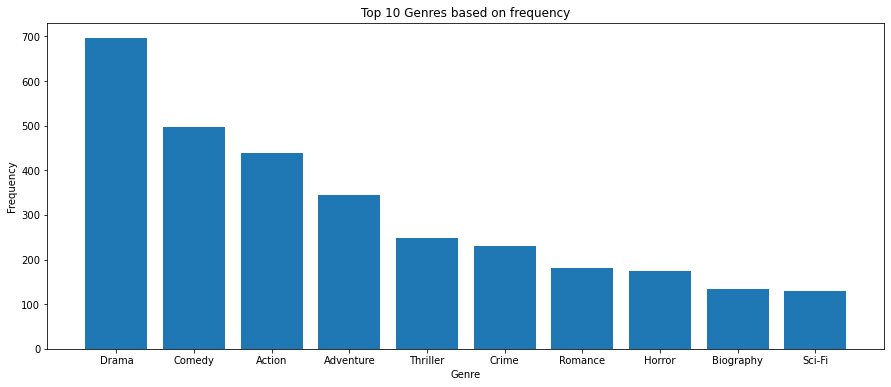

In [189]:
# Genre Frequency Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in each genre
data = genre_df['genres'].value_counts().head(10)
# Get x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Genres based on frequency')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Genre Frequency.png')

In [135]:
ROI_data = genre_df.groupby(['genres']).ROI.mean()
ROI_data = ROI_data.sort_values(ascending= False).head(10)

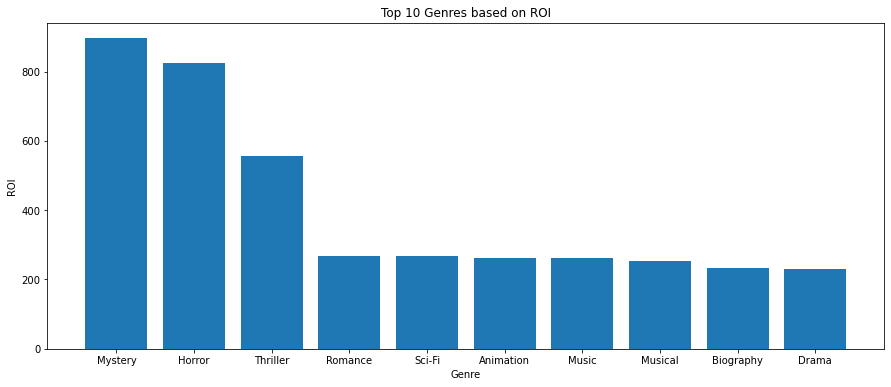

In [190]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = ROI_data.index
y = ROI_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Genres based on ROI')
ax.set_xlabel('Genre')
ax.set_ylabel('ROI')
# Save figure
plt.savefig('Top Genre ROI.png')

In [137]:
profit_data = genre_df.groupby(['genres']).profit.mean()/10**6
profit_data = profit_data.sort_values(ascending= False).head(10)

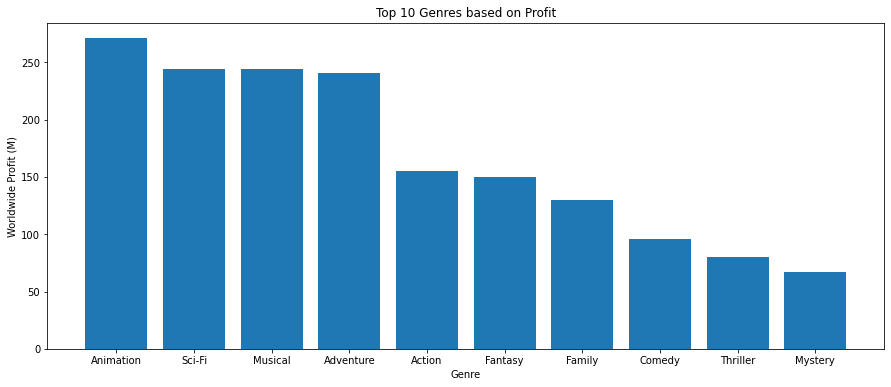

In [191]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = profit_data.index
y = profit_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Genres based on Profit')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top Genre Profit.png')

In [139]:
df5 = df4.merge(genre_df, on=['title', 'start_year', 'profit','ROI', 'month', 'production_budget', 'worldwide_gross'], how = 'inner')

In [140]:
df5= df5.drop('genres_x', 1)

In [141]:
df5.rename(columns = {'genres_y':'Genres', 
           'job': 'Staff_role', 
           'start_year': 'Released_year', 
           'title': 'Title', 
           'primary_name': 'Staff_name', 
           'production_budget': 'Investment', 
           'worldwide_gross': 'Revenue',
           'month':'Released_month',
           'profit':'Profit'}, inplace = True)

Merge exploded genre with merged dataframe (df4)

In [142]:
df5

,Title,Released_year,Staff_role,Staff_name,Investment,Revenue,Released_month,Profit,ROI,Genres
0,Jurassic World,2015,producer,Patrick Crowley,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239,Action
1,Jurassic World,2015,producer,Patrick Crowley,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239,Adventure
2,Jurassic World,2015,producer,Patrick Crowley,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239,Sci-Fi
3,Jurassic World,2015,actor,Chris Pratt,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239,Action
4,Jurassic World,2015,actor,Chris Pratt,215000000.0,1.648855e+09,6.0,1.433855e+09,666.909239,Adventure
...,...,...,...,...,...,...,...,...,...,...
35930,Housebound,2014,production_designer,Jane Bucknell,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133,Comedy
35931,Housebound,2014,production_designer,Jane Bucknell,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133,Horror
35932,Housebound,2014,production_designer,Jane Bucknell,1500000.0,2.368630e+05,10.0,-1.263137e+06,-84.209133,Mystery
35933,The Great Wall,2017,actress,Nicolette Creighton,150000000.0,3.344869e+08,2.0,1.844869e+08,122.991235,Documentary


In [143]:
 cols = df5.columns.tolist()

In [144]:
cols

['Title',
 'Released_year',
 'Staff_role',
 'Staff_name',
 'Investment',
 'Revenue',
 'Released_month',
 'Profit',
 'ROI',
 'Genres']

In [145]:
cols = ['Title', 'Genres',
 'Released_year', 'Released_month',
 'Staff_role',
 'Staff_name',
 'Investment',
 'Revenue',
 'Profit',
 'ROI',
]

In [146]:
cols

['Title',
 'Genres',
 'Released_year',
 'Released_month',
 'Staff_role',
 'Staff_name',
 'Investment',
 'Revenue',
 'Profit',
 'ROI']

In [147]:
df5 = df5[cols]
df5

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
0,Jurassic World,Action,2015,6.0,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
1,Jurassic World,Adventure,2015,6.0,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
2,Jurassic World,Sci-Fi,2015,6.0,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
3,Jurassic World,Action,2015,6.0,actor,Chris Pratt,215000000.0,1.648855e+09,1.433855e+09,666.909239
4,Jurassic World,Adventure,2015,6.0,actor,Chris Pratt,215000000.0,1.648855e+09,1.433855e+09,666.909239
...,...,...,...,...,...,...,...,...,...,...
35930,Housebound,Comedy,2014,10.0,production_designer,Jane Bucknell,1500000.0,2.368630e+05,-1.263137e+06,-84.209133
35931,Housebound,Horror,2014,10.0,production_designer,Jane Bucknell,1500000.0,2.368630e+05,-1.263137e+06,-84.209133
35932,Housebound,Mystery,2014,10.0,production_designer,Jane Bucknell,1500000.0,2.368630e+05,-1.263137e+06,-84.209133
35933,The Great Wall,Documentary,2017,2.0,actress,Nicolette Creighton,150000000.0,3.344869e+08,1.844869e+08,122.991235


In [148]:
df5['Staff_role'].value_counts()

actor                  9215
producer               7245
writer                 6571
actress                5381
director               3920
composer               1805
cinematographer        1045
editor                  498
production_designer     171
self                     81
archive_footage           3
Name: Staff_role, dtype: int64

In [149]:
df5.iloc[df5['Staff_role'] == 'self', df5.columns.get_loc('Staff_role')] = 'actor'
df5.iloc[df5['Staff_role'] == 'actress', df5.columns.get_loc('Staff_role')] = 'actor'
df5['Staff_role'].value_counts()

actor                  14677
producer                7245
writer                  6571
director                3920
composer                1805
cinematographer         1045
editor                   498
production_designer      171
archive_footage            3
Name: Staff_role, dtype: int64

# From Below: Depends on what movie genre we choose

Lets check Animation, Thriller, Sci-Fi

# Animation

# Director

In [150]:
a_df=df5[df5['Genres']=='Animation']

In [151]:
ad_df = a_df[a_df['Staff_role'] == 'director']
adr_data = ad_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
adr_data

Staff_name
Kyle Balda              1373.829428
Eric Guillon            1279.637000
Yarrow Cheney           1082.334045
Pierre Coffin           1050.148954
Chris Renaud             748.708319
Chris Buck               748.313273
Jennifer Lee             748.313273
Christophe Lourdelet     745.939719
Garth Jennings           745.939719
Christopher Miller       662.882313
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

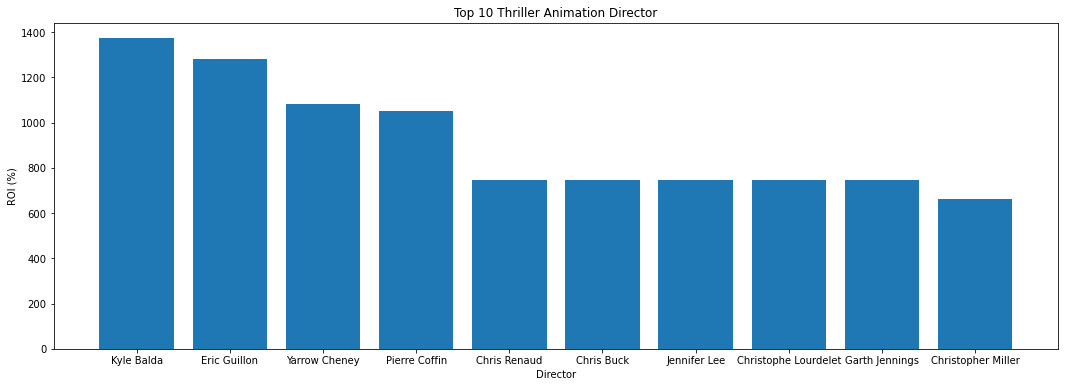

In [152]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = adr_data.index
y = adr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Thriller Animation Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Actor

In [153]:
aa_df = a_df[a_df['Staff_role'] == 'actor']
aar_data = aa_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
aar_data

Staff_name
Michael Keaton      1468.021855
Sandra Bullock      1468.021855
Pierre Coffin       1468.021855
Jon Hamm            1468.021855
Trey Parker         1279.637000
Miranda Cosgrove    1231.408523
Lake Bell           1082.334045
Louis C.K.          1082.334045
Steve Carell        1050.148954
Kristen Wiig        1035.578059
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

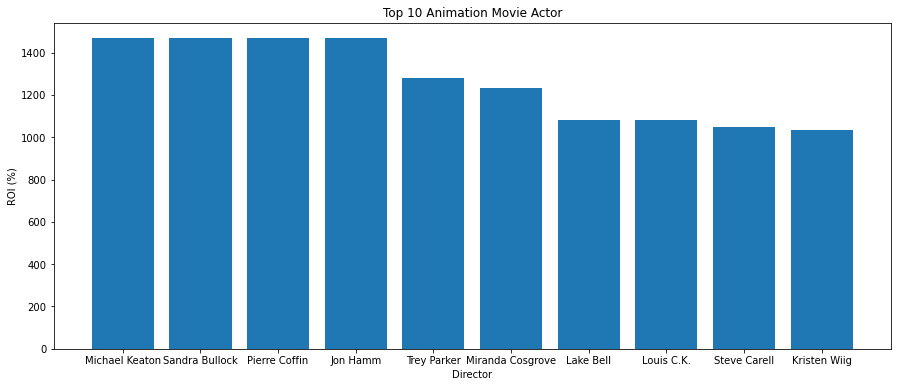

In [154]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = aar_data.index
y = aar_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Animation Movie Actor')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Writer

In [155]:
aw_df = a_df[a_df['Staff_role'] == 'writer']
awr_data = aw_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
awr_data

Staff_name
Ken Daurio       886.447481
Cinco Paul       886.447481
Lori Forte       826.068565
Jason Fuchs      826.068565
Shane Morris     748.313273
Kyle Hunter      643.917132
Ariel Shaffir    643.917132
Evan Goldberg    643.917132
Brian Lynch      623.683042
Rob Lieber       594.272954
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

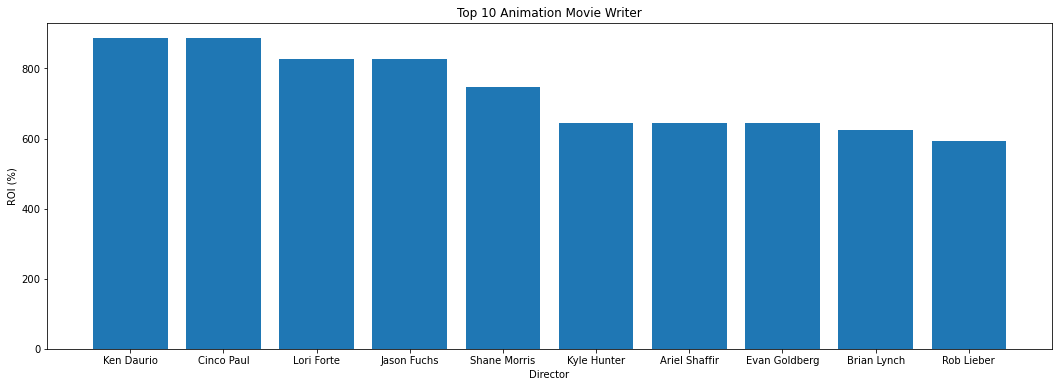

In [156]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = awr_data.index
y = awr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Animation Movie Writer')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Producer

In [157]:
ap_df = a_df[a_df['Staff_role'] == 'producer']
apr_data = ap_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
apr_data

Staff_name
Janet Healy               966.800339
John C. Donkin            826.068565
Peter Del Vecho           748.313273
Christopher Meledandri    727.657497
John Cohen                687.629816
Megan Ellison             643.917132
Michelle Murdocca         598.883811
John Walker               521.260355
Nicole Paradis Grindle    521.260355
Lindsey Collins           410.607596
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

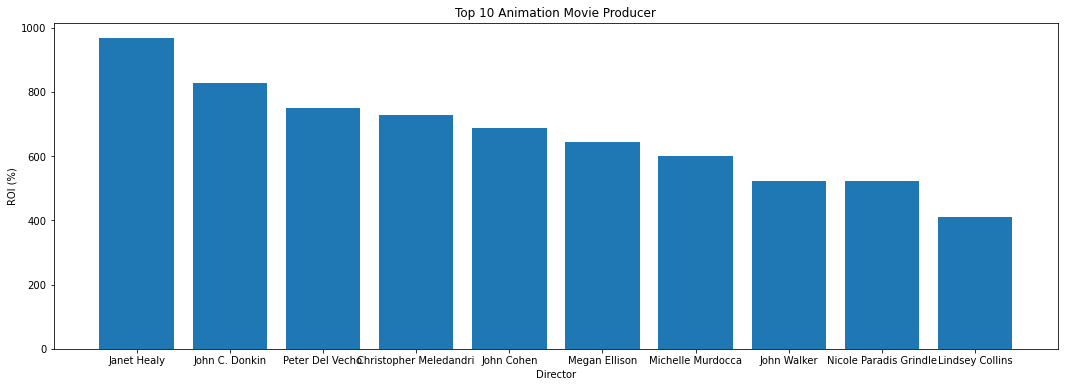

In [158]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = apr_data.index
y = apr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Animation Movie Producer')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Anime Producer.png')

# Month

In [159]:
animation_df=df5[df5['Genres']=='Animation']
animation_df

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
140,The Lego Movie,Animation,2014,2.0,actor,Chris Pratt,60000000.0,457729388.0,397729388.0,662.882313
143,The Lego Movie,Animation,2014,2.0,actor,Will Ferrell,60000000.0,457729388.0,397729388.0,662.882313
146,The Lego Movie,Animation,2014,2.0,actor,Elizabeth Banks,60000000.0,457729388.0,397729388.0,662.882313
149,The Lego Movie,Animation,2014,2.0,actor,Will Arnett,60000000.0,457729388.0,397729388.0,662.882313
152,The Lego Movie,Animation,2014,2.0,director,Phil Lord,60000000.0,457729388.0,397729388.0,662.882313
...,...,...,...,...,...,...,...,...,...,...
35674,L'illusionniste,Animation,2010,12.0,actor,Duncan MacNeil,17000000.0,8609949.0,-8390051.0,-49.353241
35676,L'illusionniste,Animation,2010,12.0,actor,Raymond Mearns,17000000.0,8609949.0,-8390051.0,-49.353241
35678,L'illusionniste,Animation,2010,12.0,director,Sylvain Chomet,17000000.0,8609949.0,-8390051.0,-49.353241
35680,L'illusionniste,Animation,2010,12.0,producer,Sally Chomet,17000000.0,8609949.0,-8390051.0,-49.353241


In [160]:
animation_df.drop_duplicates('Title')

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
140,The Lego Movie,Animation,2014,2.0,actor,Chris Pratt,60000000.0,4.577294e+08,397729388.0,662.882313
851,Toy Story 3,Animation,2010,6.0,writer,Andrew Stanton,200000000.0,1.068880e+09,868879522.0,434.439761
881,Finding Dory,Animation,2016,6.0,director,Andrew Stanton,200000000.0,1.021215e+09,821215193.0,410.607596
911,Brave,Animation,2012,6.0,director,Mark Andrews,185000000.0,5.546065e+08,369606532.0,199.787315
1256,Sherlock Gnomes,Animation,2018,3.0,actor,Johnny Depp,59000000.0,8.752765e+07,28527651.0,48.351951
...,...,...,...,...,...,...,...,...,...,...
33451,Cloudy with a Chance of Meatballs 2,Animation,2013,9.0,writer,Erica Rivinoja,78000000.0,2.743926e+08,196392649.0,251.785447
34242,Mr. Peabody & Sherman,Animation,2014,3.0,actor,Ty Burrell,145000000.0,2.698064e+08,124806430.0,86.073400
35339,The Star,Animation,2017,11.0,composer,John Paesano,20000000.0,6.275801e+07,42758010.0,213.790050
35459,Khumba,Animation,2013,12.0,actor,Jake T. Austin,15000000.0,2.089822e+07,5898221.0,39.321473


In [161]:
df5['Released_month'] = df5['Released_month'].astype(int)

In [162]:
months =['January','February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
months_num = range(1,13)

[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

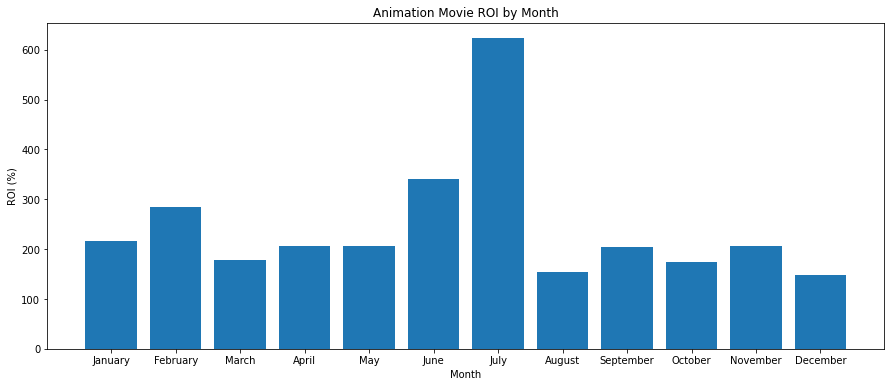

In [163]:
mra_data = animation_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = mra_data.index
y = mra_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Animation Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
#plt.savefig('Top Genre Profit.png')

The result shows that July will be the best month to release Animation movie. Else than July, June and Februrary is an alternative month options. Usually June and July is a month for Summer break.

# Sci-Fi

# Director

In [164]:
sf_df=df5[df5['Genres']=='Sci-Fi']

In [165]:
sfd_df = sf_df[sf_df['Staff_role'] == 'director']
sfdr_data = sfd_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
sfdr_data

Staff_name
M. Night Shyamalan    1126.517525
James DeMonaco        1112.211863
Luc Besson            1043.769440
Gerard McMurray        950.902346
Josh Trank             930.681583
Gary Ross              747.404224
Scott Stewart          691.546029
J.A. Bayona            668.101646
David Gelb             667.186200
Colin Trevorrow        666.909239
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

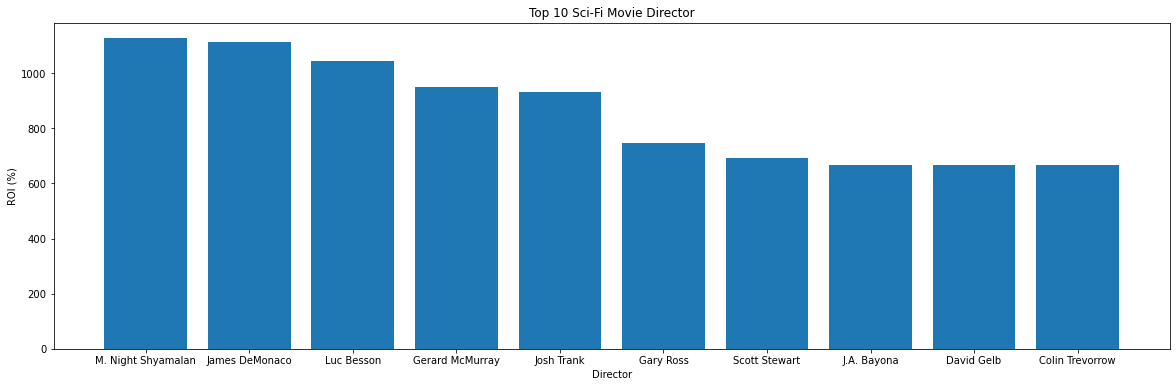

In [166]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,6))
# Get x and y data
x = sfdr_data.index
y = sfdr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Sci-Fi Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Actor / Actress

In [167]:
sfa_df = sf_df[sf_df['Staff_role'] == 'actor']
sfar_data = sfa_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
sfar_data

Staff_name
John Krasinski        1867.778200
Millicent Simmonds    1867.778200
Noah Jupe             1867.778200
Zach Gilford          1139.276456
Kiele Sanchez         1139.276456
Carmen Ejogo          1139.276456
Bruce Willis          1126.517525
Frank Grillo          1112.211863
DJ Flava              1101.588000
William Mapother      1101.588000
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

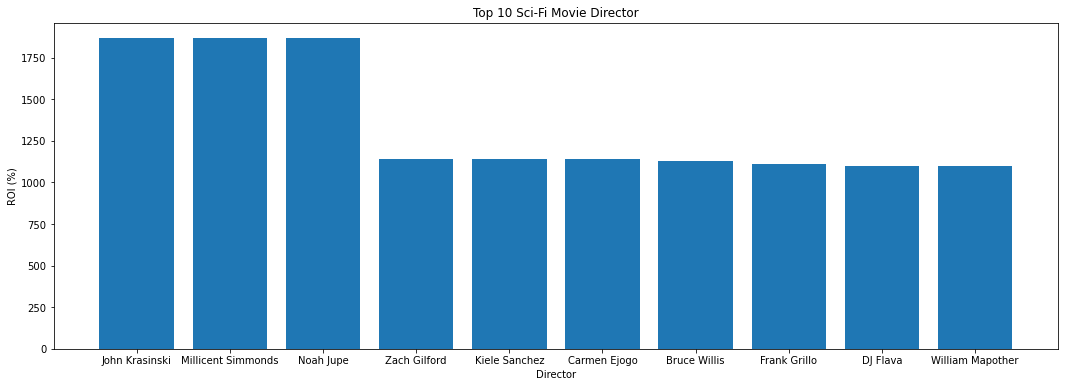

In [168]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = sfar_data.index
y = sfar_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Sci-Fi Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Writer

In [169]:
sfw_df = sf_df[sf_df['Staff_role'] == 'writer']
sfwr_data = sfw_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
sfwr_data

Staff_name
Scott Beck            1867.778200
Bryan Woods           1867.778200
James DeMonaco         950.902346
Grant Pierce Myers     924.470179
Noah Oppenheim         924.470179
Billy Ray              747.404224
Colin Trevorrow        668.101646
Derek Connolly         667.505443
Luke Dawson            667.186200
Jeremy Slater          667.186200
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

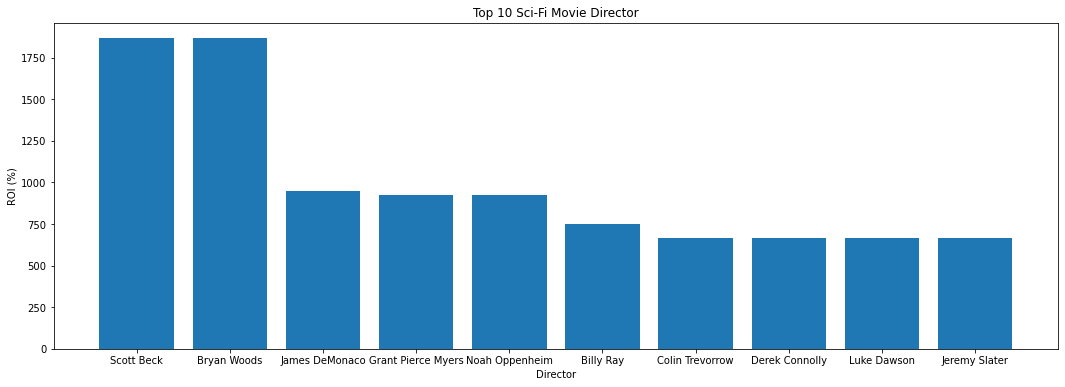

In [170]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = sfwr_data.index
y = sfwr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Sci-Fi Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Producer

In [171]:
sfp_df = sf_df[sf_df['Staff_role'] == 'producer']
sfpr_data = sfp_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
sfpr_data

Staff_name
Ashwin Rajan              1126.517525
Marc Bienstock            1126.517525
Sébastien K. Lemercier    1112.211863
Nick Shumaker             1101.588000
Virginie Besson-Silla     1043.769440
Andrew Form               1043.469916
Brad Fuller               1043.469916
Allan Niblo               1027.946000
James Richardson          1027.946000
Adam Schroeder             930.681583
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

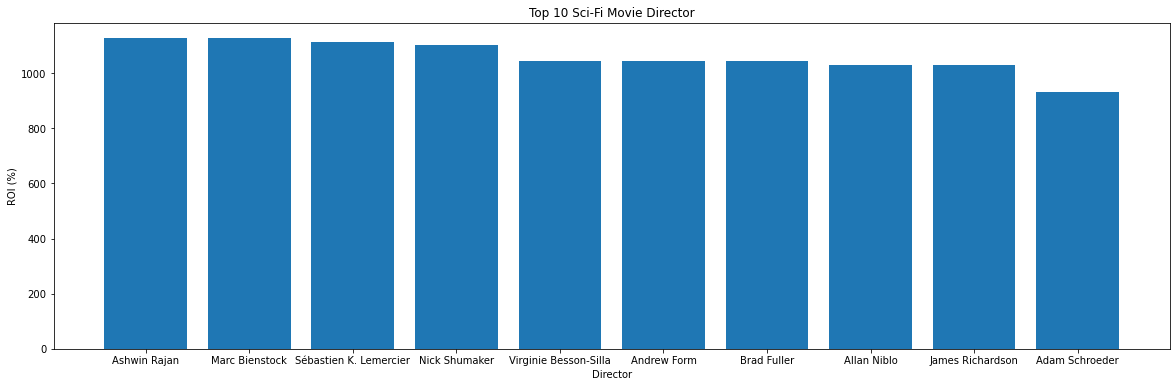

In [172]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,6))
# Get x and y data
x = sfpr_data.index
y = sfpr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Sci-Fi Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Month

In [173]:
sf_df=df5[df5['Genres']=='Sci-Fi']
sf_df = sf_df.drop_duplicates('Title')
sf_df

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
2,Jurassic World,Sci-Fi,2015,6,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
113,Jurassic World: Fallen Kingdom,Sci-Fi,2018,6,producer,Patrick Crowley,170000000.0,1.305773e+09,1.135773e+09,668.101646
214,Passengers,Sci-Fi,2016,12,actor,Chris Pratt,110000000.0,3.022397e+08,1.922397e+08,174.763338
551,Rise of the Planet of the Apes,Sci-Fi,2011,8,writer,Rick Jaffa,93000000.0,4.709862e+08,3.779862e+08,406.436774
659,John Carter,Sci-Fi,2012,3,producer,Jim Morris,275000000.0,2.827781e+08,7.778100e+06,2.828400
...,...,...,...,...,...,...,...,...,...,...
33562,The Dead Undead,Sci-Fi,2010,12,actor,Luke Goss,1100000.0,0.000000e+00,-1.100000e+06,-100.000000
33692,Unnatural,Sci-Fi,2015,12,director,Hank Braxtan,3000000.0,0.000000e+00,-3.000000e+06,-100.000000
34757,Independence Daysaster,Sci-Fi,2013,12,composer,Michael Neilson,1800000.0,0.000000e+00,-1.800000e+06,-100.000000
34786,Skyline,Sci-Fi,2010,11,composer,Matthew Margeson,10000000.0,6.826497e+07,5.826497e+07,582.649730


[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

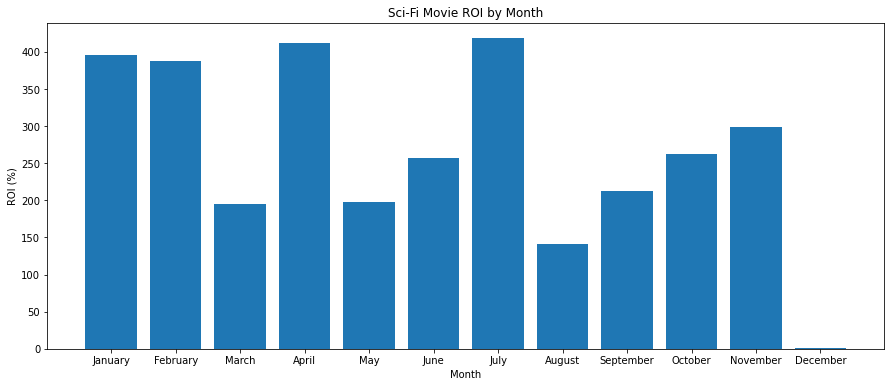

In [174]:
sfa_data = sf_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = sfa_data.index
y = sfa_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Sci-Fi Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
#plt.savefig('Top Genre Profit.png')

Sci-fi seems to have multiple good months to release. 
Definitely not December
Good time for release is April and July while January and February can be alternative

# Thriller

# Director

In [175]:
t_df=df5[df5['Genres']=='Thriller']
t_df

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
29,The Bourne Legacy,Thriller,2012,8,producer,Patrick Crowley,125000000.0,280355920.0,155355920.0,124.284736
32,The Bourne Legacy,Thriller,2012,8,producer,Ben Smith,125000000.0,280355920.0,155355920.0,124.284736
35,The Bourne Legacy,Thriller,2012,8,actor,Jeremy Renner,125000000.0,280355920.0,155355920.0,124.284736
38,The Bourne Legacy,Thriller,2012,8,actor,Rachel Weisz,125000000.0,280355920.0,155355920.0,124.284736
41,The Bourne Legacy,Thriller,2012,8,actor,Edward Norton,125000000.0,280355920.0,155355920.0,124.284736
...,...,...,...,...,...,...,...,...,...,...
35812,Dutch Kills,Thriller,2015,12,actor,Tama Filianga,25000.0,0.0,-25000.0,-100.000000
35815,Dutch Kills,Thriller,2015,12,actor,Mikaal Bates,25000.0,0.0,-25000.0,-100.000000
35818,Dutch Kills,Thriller,2015,12,actor,Celestine Rae,25000.0,0.0,-25000.0,-100.000000
35821,Dutch Kills,Thriller,2015,12,producer,Liam Le Guillou,25000.0,0.0,-25000.0,-100.000000


In [176]:
td_df = t_df[t_df['Staff_role'] == 'director']
tdr_data = td_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
tdr_data

Staff_name
Chris Lofing        41556.474000
Travis Cluff        41556.474000
Bradley Parker       4141.172100
John R. Leonetti     3851.737231
Ariel Schulman       3398.578360
Henry Joost          3398.578360
Jordan Peele         3089.205285
Asghar Farhadi       2953.271125
James DeMonaco       2942.219367
Jeff Wadlow          2617.924114
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

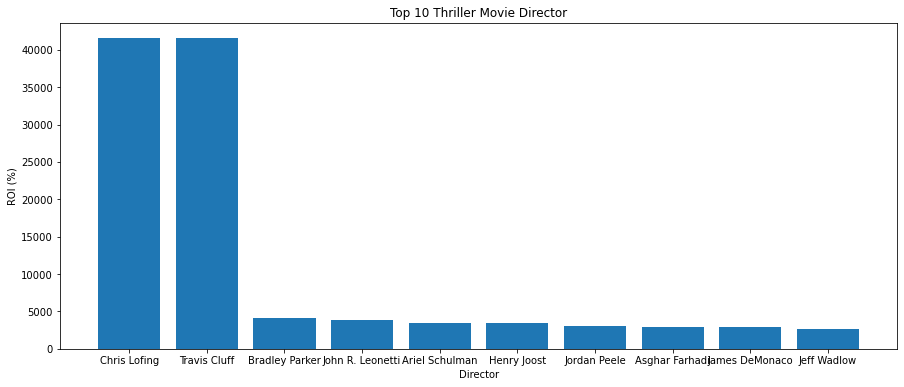

In [177]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = tdr_data.index
y = tdr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Thriller Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Actor/ Actress

In [178]:
ta_df = t_df[t_df['Staff_role'] == 'actor']
tar_data = ta_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
tar_data

Staff_name
Cassidy Gifford      41556.47400
Pfeifer Brown        41556.47400
Reese Mishler        41556.47400
Ryan Shoos           41556.47400
Bradley Whitford      5007.35902
Daniel Kaluuya        5007.35902
Allison Williams      5007.35902
Nathan Phillips       4141.17210
Jesse McCartney       4141.17210
Jonathan Sadowski     4141.17210
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

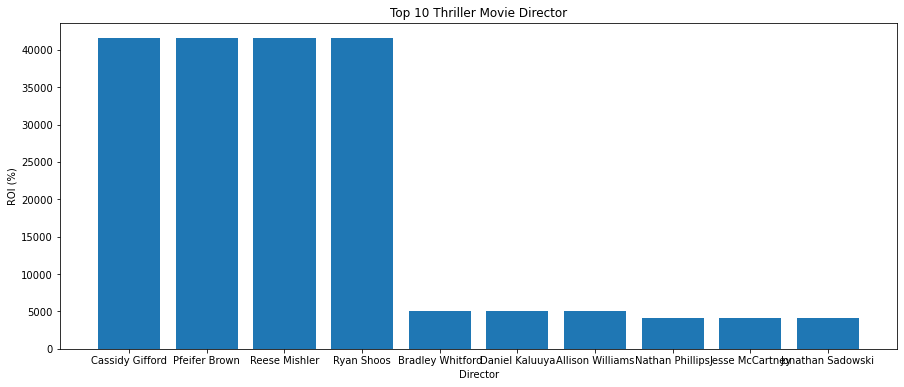

In [179]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = tar_data.index
y = tar_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Thriller Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Writer

In [180]:
tw_df = t_df[t_df['Staff_role'] == 'writer']
twr_data = tw_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
twr_data

Staff_name
Carey Van Dyke        4141.172100
Shane Van Dyke        4141.172100
Christopher Landon    3398.578360
Oren Peli             3164.106475
Chad Feehan           2756.359840
Jillian Jacobs        2617.924114
Michael Reisz         2617.924114
Zhongsan Mou          2617.924114
Gary Dauberman        2560.124462
Danny McBride         2449.006670
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

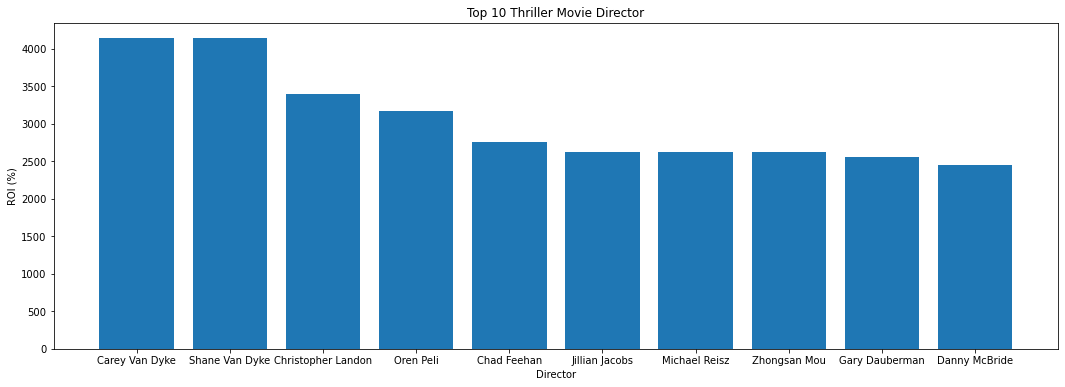

In [181]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = twr_data.index
y = twr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Thriller Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Producer

In [182]:
tp_df = t_df[t_df['Staff_role'] == 'producer']
tpr_data = tp_df.groupby(['Staff_name']).ROI.mean().sort_values(ascending = False). head(10)
tpr_data

Staff_name
Benjamin Forkner          41556.474000
Guymon Casady             41556.474000
Dean Schnider             41556.474000
Edward H. Hamm Jr.         5007.359020
Brian Witten               4141.172100
Eric Newman                3798.105556
Jason Blum                 3226.672685
Sean McKittrick            3089.205285
Sébastien K. Lemercier     2942.219367
Jera Wang                  2617.924114
Name: ROI, dtype: float64

Text(0, 0.5, 'ROI (%)')

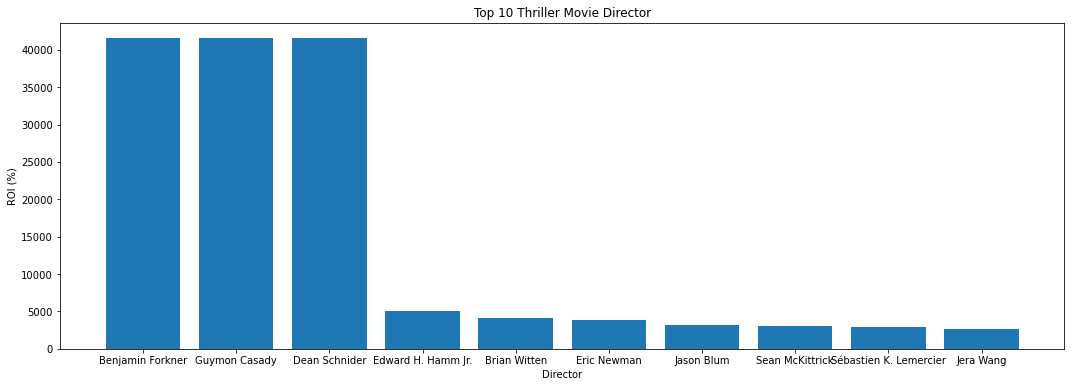

In [183]:
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))
# Get x and y data
x = tpr_data.index
y = tpr_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Thriller Movie Director')
ax.set_xlabel('Director')
ax.set_ylabel('ROI (%)')
# Save figure
#plt.savefig('Top Genre Profit.png')

# Month for Release

In [184]:
t_df=df5[df5['Genres']=='Thriller']
t_df = t_df.drop_duplicates('Title')
t_df

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
29,The Bourne Legacy,Thriller,2012,8,producer,Patrick Crowley,125000000.0,280355920.0,155355920.0,124.284736
56,Abduction,Thriller,2011,9,producer,Patrick Crowley,35000000.0,86648359.0,51648359.0,147.566740
163,Zero Dark Thirty,Thriller,2012,12,actor,Chris Pratt,52500000.0,134612435.0,82112435.0,156.404638
472,Halloween,Thriller,2018,10,actor,Judy Greer,10000000.0,254900667.0,244900667.0,2449.006670
686,Savages,Thriller,2012,7,actor,Taylor Kitsch,45000000.0,82513490.0,37513490.0,83.363311
...,...,...,...,...,...,...,...,...,...,...
35194,The Frozen,Thriller,2012,12,editor,David Heinz,250000.0,0.0,-250000.0,-100.000000
35215,Wind Walkers,Thriller,2015,12,producer,Dori A. Rath,2000000.0,0.0,-2000000.0,-100.000000
35499,Crowsnest,Thriller,2012,9,director,Brenton Spencer,1200000.0,0.0,-1200000.0,-100.000000
35686,The Sound and the Shadow,Thriller,2014,12,actor,Mary Kate Wiles,500000.0,0.0,-500000.0,-100.000000


[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

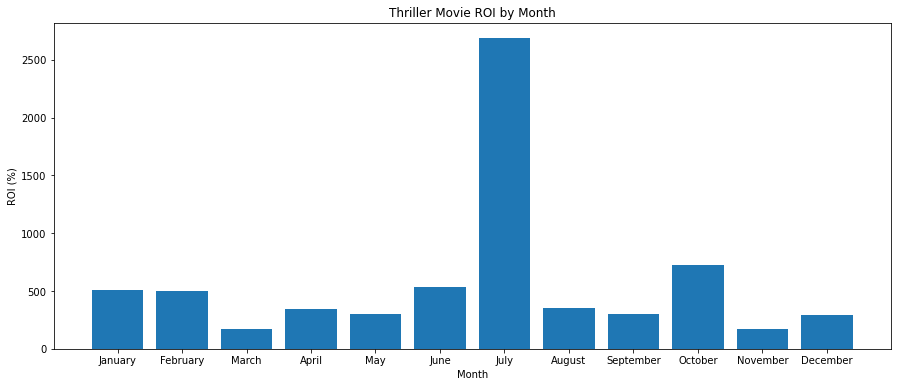

In [185]:
ta_data = t_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = ta_data.index
y = ta_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Thriller Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
#plt.savefig('Top Genre Profit.png')

Significantly good in July. Other than that it will not be a good movie choice.

In [186]:
df5

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
0,Jurassic World,Action,2015,6,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
1,Jurassic World,Adventure,2015,6,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
2,Jurassic World,Sci-Fi,2015,6,producer,Patrick Crowley,215000000.0,1.648855e+09,1.433855e+09,666.909239
3,Jurassic World,Action,2015,6,actor,Chris Pratt,215000000.0,1.648855e+09,1.433855e+09,666.909239
4,Jurassic World,Adventure,2015,6,actor,Chris Pratt,215000000.0,1.648855e+09,1.433855e+09,666.909239
...,...,...,...,...,...,...,...,...,...,...
35930,Housebound,Comedy,2014,10,production_designer,Jane Bucknell,1500000.0,2.368630e+05,-1.263137e+06,-84.209133
35931,Housebound,Horror,2014,10,production_designer,Jane Bucknell,1500000.0,2.368630e+05,-1.263137e+06,-84.209133
35932,Housebound,Mystery,2014,10,production_designer,Jane Bucknell,1500000.0,2.368630e+05,-1.263137e+06,-84.209133
35933,The Great Wall,Documentary,2017,2,actor,Nicolette Creighton,150000000.0,3.344869e+08,1.844869e+08,122.991235


In [187]:
df5.loc[df5['Staff_name'] == 'James DeMonaco']

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
7348,The Purge,Horror,2013,6,director,James DeMonaco,3000000.0,91266581.0,88266581.0,2942.219367
7349,The Purge,Thriller,2013,6,director,James DeMonaco,3000000.0,91266581.0,88266581.0,2942.219367
16208,The Purge: Anarchy,Action,2014,7,director,James DeMonaco,9000000.0,111534881.0,102534881.0,1139.276456
16209,The Purge: Anarchy,Horror,2014,7,director,James DeMonaco,9000000.0,111534881.0,102534881.0,1139.276456
16210,The Purge: Anarchy,Sci-Fi,2014,7,director,James DeMonaco,9000000.0,111534881.0,102534881.0,1139.276456
16238,The First Purge,Action,2018,7,writer,James DeMonaco,13000000.0,136617305.0,123617305.0,950.902346
16239,The First Purge,Horror,2018,7,writer,James DeMonaco,13000000.0,136617305.0,123617305.0,950.902346
16240,The First Purge,Sci-Fi,2018,7,writer,James DeMonaco,13000000.0,136617305.0,123617305.0,950.902346
16268,The Purge: Election Year,Action,2016,7,director,James DeMonaco,10000000.0,118514727.0,108514727.0,1085.147270
16269,The Purge: Election Year,Horror,2016,7,director,James DeMonaco,10000000.0,118514727.0,108514727.0,1085.147270


In [188]:
m_b

,title,production_budget,worldwide_gross,month,start_year,profit,ROI
0,Avatar,425000000.0,2.776345e+09,12.0,2009.0,2.351345e+09,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,5.0,2011.0,6.350639e+08,154.667286
2,Dark Phoenix,350000000.0,1.497624e+08,6.0,2019.0,-2.002376e+08,-57.210757
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,5.0,2015.0,1.072414e+09,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,12.0,2017.0,9.997217e+08,315.369636
...,...,...,...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,12.0,2018.0,-7.000000e+03,-100.000000
5778,Following,6000.0,2.404950e+05,4.0,1999.0,2.344950e+05,3908.250000
5779,Return to the Land of Wonders,5000.0,1.338000e+03,7.0,2005.0,-3.662000e+03,-73.240000
5780,A Plague So Pleasant,1400.0,0.000000e+00,9.0,2015.0,-1.400000e+03,-100.000000


# Movie Genre

In [233]:
def genre_profit(genre):
    sample_df = df5.loc[df5['Genres'] == genre]
    print(genre)
    print('<Profit in Millions>')
    print(sample_df['Profit'].describe()/10**6)
    print()
    print('<ROI>')
    print(sample_df['ROI'].describe())
    print()
    sample_df.boxplot(by='Genres', column =['Profit'], figsize = (8,6) )
    sample_df.boxplot(by='Genres', column =['ROI'], figsize = (8,6) )

In [223]:
genres = df5['Genres'].unique().tolist()
genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Mystery',
 'Comedy',
 'Crime',
 'Animation',
 'Drama',
 'Romance',
 'Western',
 'Biography',
 'Music',
 'Fantasy',
 'Family',
 'Horror',
 'History',
 'Musical',
 'Sport',
 'War',
 'Documentary']

Adventure
<Profit in Millions>
count       0.003286
mean      235.602875
std       292.200722
min      -200.237650
25%        22.956466
50%       124.790560
75%       368.214888
max      1748.134200
Name: Profit, dtype: float64

<ROI>
count    3286.000000
mean      209.324743
std       242.716435
min      -100.000000
25%        50.378670
50%       163.339677
75%       302.716661
max      1468.021855
Name: ROI, dtype: float64



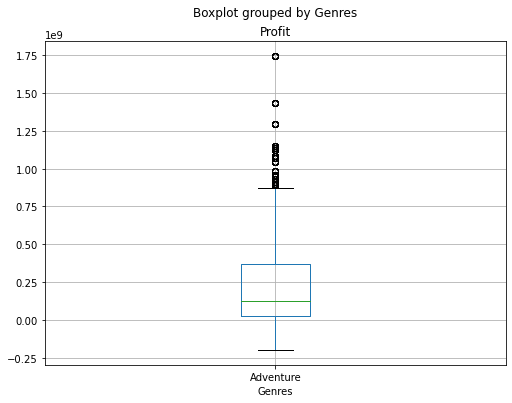

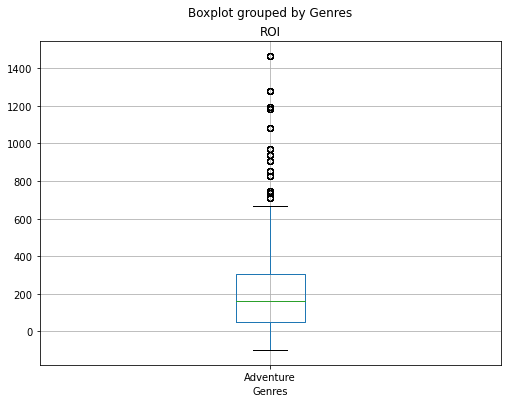

In [237]:
genre_profit('Adventure')

<AxesSubplot:title={'center':'Profit'}, xlabel='Genres'>

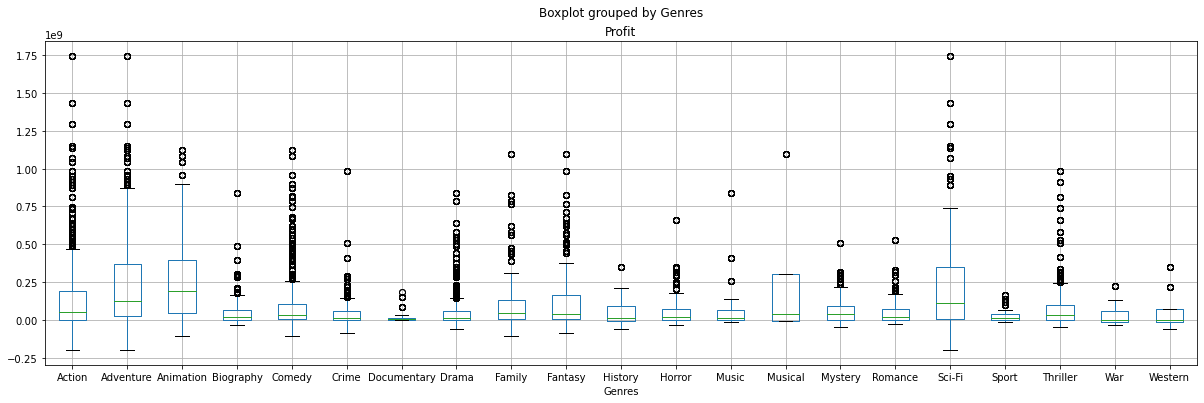

In [231]:
df5.boxplot(by='Genres', column =['Profit'], figsize = (20,6) )

<AxesSubplot:title={'center':'ROI'}, xlabel='Genres'>

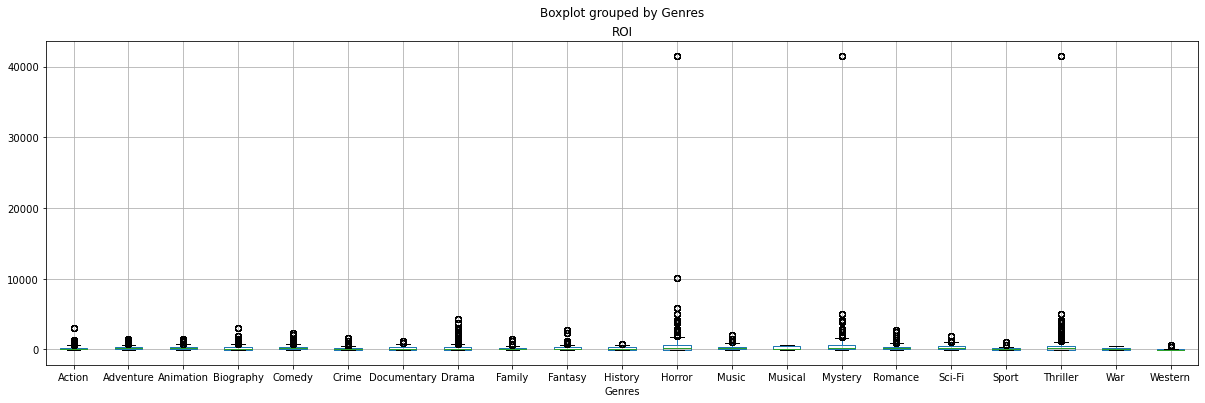

In [232]:
df5.boxplot(by='Genres', column =['ROI'], figsize = (20,6) )

In [238]:
import seaborn as sns

In [244]:
top4 = df5.loc[(df5['Genres'] == 'Animation')|(df5['Genres'] == 'Sci-Fi')|(df5['Genres'] == 'Adventure')| (df5['Genres']== 'Musical')]

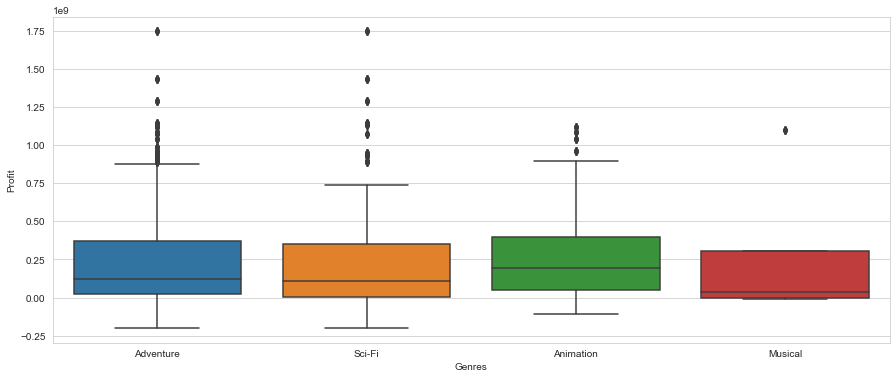

In [247]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='Genres', y = 'Profit', data= top4)
sns.set_style("dark")

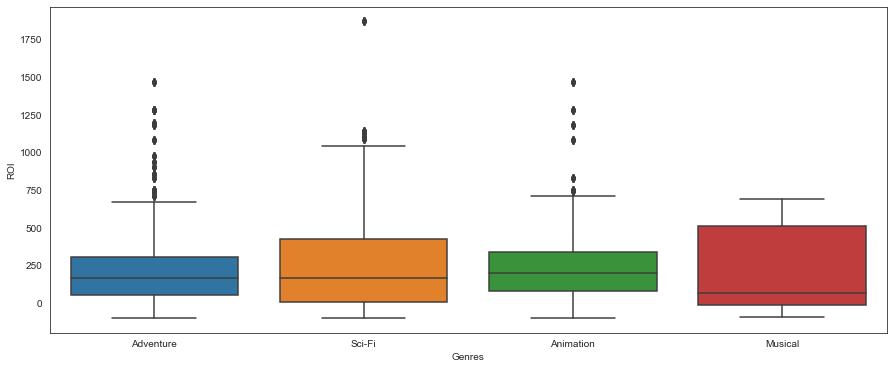

In [250]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='Genres', y = 'ROI', data= top4)

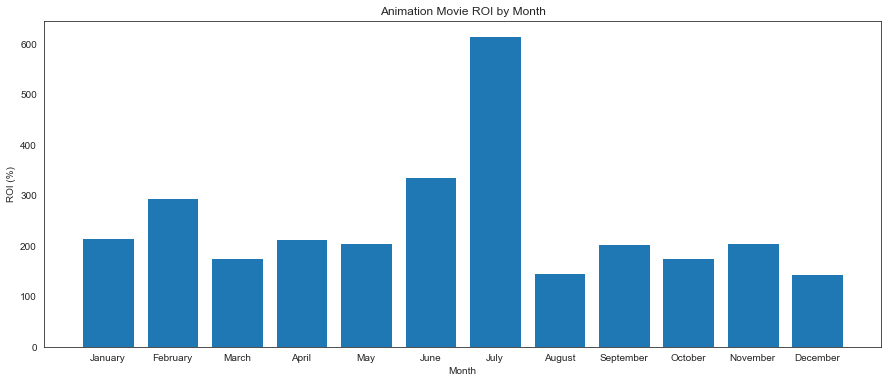

In [255]:
g_df=df5[df5['Genres']=='Animation']
g_df = g_df.drop_duplicates('Title')
ga_data = g_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = ga_data.index
y = ga_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Animation Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
plt.savefig('Anime Monthly ROI.png')

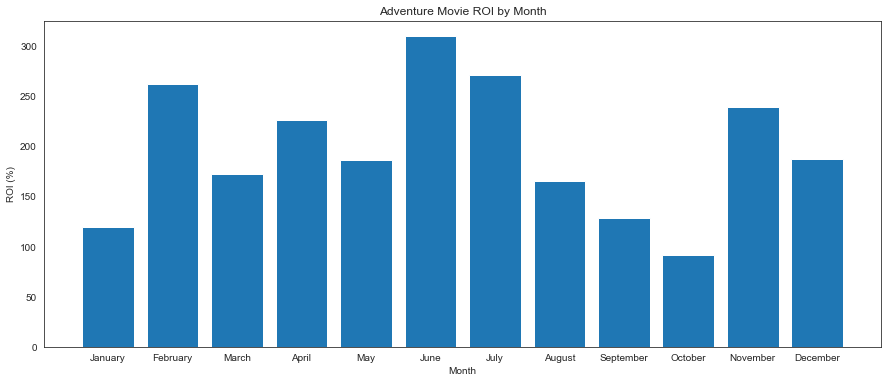

In [254]:
g_df=df5[df5['Genres']=='Adventure']
g_df = g_df.drop_duplicates('Title')
ga_data = g_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = ga_data.index
y = ga_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Adventure Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
plt.savefig('Adventure Monthly ROI.png')

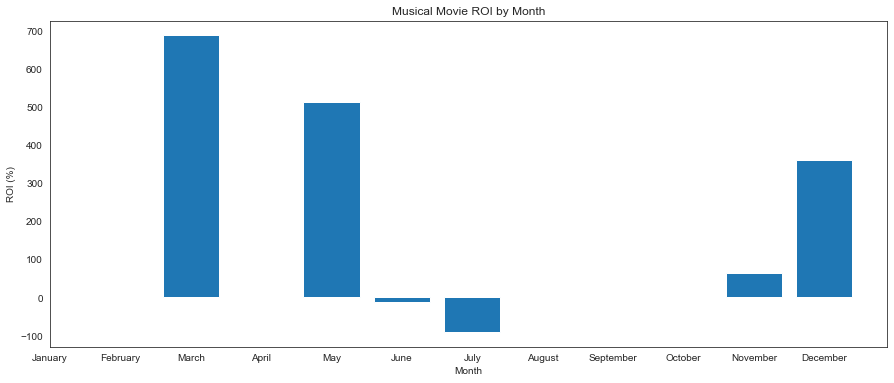

In [256]:
g_df=df5[df5['Genres']=='Musical']
g_df = g_df.drop_duplicates('Title')
ga_data = g_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = ga_data.index
y = ga_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Musical Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
plt.savefig('Musical Monthly ROI.png')

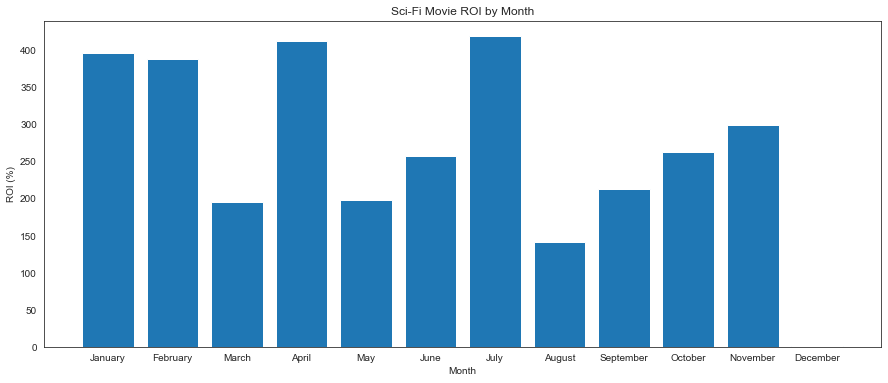

In [269]:
g_df=df5[df5['Genres']=='Sci-Fi']
g_df = g_df.drop_duplicates('Title')
ga_data = g_df.groupby(['Released_month']).ROI.mean()
# Genre ROI Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Get x and y data
x = ga_data.index
y = ga_data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Sci-Fi Movie ROI by Month')
ax.set_xlabel('Month')
ax.set_ylabel('ROI (%)')
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Save figure
plt.savefig('Sci-Fi Monthly ROI.png')

In [274]:
df5['Star' isin df5['Title']]
#g_df=df5[df5['Genres']=='']
#g_df = g_df.drop_duplicates('Title')
#g_df

SyntaxError: invalid syntax (<ipython-input-274-d6c757058f09>, line 1)

In [281]:
df5[df5['Title'].str.contains("Captain")].drop_duplicates('Title')

,Title,Genres,Released_year,Released_month,Staff_role,Staff_name,Investment,Revenue,Profit,ROI
4090,Captain America: The First Avenger,Action,2011,7,actor,Samuel L. Jackson,140000000.0,3.705698e+08,230569776.0,164.692697
4114,Captain America: The Winter Soldier,Action,2014,4,actor,Samuel L. Jackson,170000000.0,7.144019e+08,544401889.0,320.236405
4198,Captain Marvel,Action,2019,3,actor,Samuel L. Jackson,175000000.0,1.123062e+09,948061550.0,541.749457
25395,Captain Phillips,Biography,2013,10,actor,Tom Hanks,55000000.0,2.206482e+08,165648184.0,301.178516
27885,Captain Underpants: The First Epic Movie,Action,2017,6,actor,Ed Helms,38000000.0,1.265779e+08,88577874.0,233.099668
32362,Captain America: Civil War,Action,2016,5,actor,Robert Downey Jr.,250000000.0,1.140069e+09,890069413.0,356.027765
